In [1]:
# Data Science Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import datetime

# Linear ALgorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# Tree Based Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Machine Learning proccessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# I got HEROKU to work. Here were my pip package versions:
# certifi==2022.5.18.1
# click==8.1.3
# colorama==0.4.4
# Flask==2.1.2
# gunicorn==20.1.0
# importlib-metadata==4.11.4
# itsdangerous==2.1.2
# Jinja2==3.1.2
# joblib==1.1.0
# MarkupSafe==2.1.1
# numpy==1.21.6
# pandas==1.3.5
# python-dateutil==2.8.2
# pytz==2022.1
# scikit-learn==1.0.2
# scipy==1.7.3
# six==1.16.0
# threadpoolctl==3.1.0
# typing_extensions==4.2.0
# Werkzeug==2.1.2
# wincertstore==0.2
# zipp==3.8.0

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1776
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1565 non-null   float64       
 1   Volatility  1565 non-null   float64       
 2   Node        1565 non-null   object        
 3   Date        1565 non-null   datetime64[ns]
 4   Sit         1565 non-null   float64       
 5   INV         1565 non-null   int64         
 6   DNG         1565 non-null   float64       
 7   QNG         1565 non-null   float64       
 8   HHDiffit    1565 non-null   float64       
 9   Ft          1565 non-null   float64       
 10  COT         1565 non-null   int64         
 11  HHst        1565 non-null   float64       
 12  dngt        1565 non-null   float64       
 13  icot        1565 non-null   float64       
 14  idng        1565 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(2), object(1)
memory usage: 195

In [3]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [4]:
# Read in CSV
df = pd.read_csv("FinalDS.csv")

In [5]:
colsnew = ['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

In [6]:
dfnew = df.loc[:, colsnew]
dfnew

Returns  Volatility           Node        Date    Sit   INV  \
0              NaN         NaN           East    1/1/2010   7.66   769   
1    -4.813032e-01    0.484173           East    1/8/2010   7.66   703   
2     5.877867e-01    0.595347           East   1/15/2010   7.66   642   
3     5.884050e-02    0.061240           East   1/22/2010   7.66   616   
4     4.196420e-02    0.044199           East   1/29/2010   7.66   582   
5     1.677563e-01    0.171219           East    2/5/2010   8.06   523   
6    -3.137512e-02    0.029855           East   2/12/2010   8.06   471   
7     5.427689e-02    0.056632           East   2/19/2010   8.06   425   
8     1.854613e-01    0.189097           East   2/26/2010   8.06   390   
9    -3.140000e-03    0.001340           East    3/5/2010   7.92   349   
10    8.727340e-02    0.089951           East   3/12/2010   7.92   341   
11    6.147186e-02    0.063897           East   3/19/2010   7.92   334   
12    5.791092e-02    0.060302           East   3/26/2010   7.92   336   
13    1.690195e-01    0.172494           East    4/2/2010   8.45   333   
14   -3.965277e-02    0.038214           East    4/9/2010   8.45   358   
15   -1.357487e-02    0.011881           East   4/16/2010   8.45   376   
16    1.581954e-02    0.017800           East   4/23/2010   8.45   397   
17   -3.886203e-02    0.037415           East   4/30/2010   8.45   416   
18    1.904470e-01    0.194131           East    5/7/2010   9.13   444   
19   -4.936837e-02    0.048024           East   5/14/2010   9.13   463   
20   -1.427139e-02    0.012585           East   5/21/2010   9.13   491   
21    1.629364e-02    0.018278           East   5/28/2010   9.13   518   
22    4.541748e-02    0.047686           East    6/4/2010   9.62   545   
23   -5.761275e-02    0.056349           East   6/11/2010   9.62   571   
24   -7.868031e-02    0.077622           East   6/18/2010   9.62   596   
25    3.692059e-02    0.039107           East   6/25/2010   9.62   615   
26    1.372558e-01    0.140421           East    7/2/2010  10.04   638   
27    1.860000e-03    0.003700           East    7/9/2010  10.04   659   
28    3.105272e-02    0.033182           East   7/16/2010  10.04   681   
29   -2.919916e-02    0.027658           East   7/23/2010  10.04   698   
30   -2.058071e-02    0.018956           East   7/30/2010  10.04   716   
31    7.113299e-02    0.073653           East    8/6/2010  10.48   737   
32    6.475857e-02    0.067216           East   8/13/2010  10.48   758   
33    1.960847e-02    0.021626           East   8/20/2010  10.48   781   
34    5.355610e-02    0.055904           East   8/27/2010  10.48   805   
35   -1.084327e-01    0.107665           East    9/3/2010   9.61   814   
36   -6.860000e-03    0.005100           East   9/10/2010   9.61   835   
37   -3.681397e-02    0.035347           East   9/17/2010   9.61   856   
38    0.000000e+00    0.001826           East   9/24/2010   9.61   876   
39   -7.039193e-01    0.708961           East   10/1/2010   6.56   896   
40    9.301020e-02    0.095743           East   10/8/2010   6.56   912   
41    9.820000e-03    0.011700           East  10/15/2010   6.56   930   
42    3.834336e-02    0.040543           East  10/22/2010   6.56   940   
43    1.863408e-02    0.020642           East  10/29/2010   6.56   955   
44   -1.706971e-01    0.170537           East   11/5/2010   6.13   950   
45   -1.200667e-01    0.119412           East  11/12/2010   6.13   940   
46   -1.242252e-02    0.010718           East  11/19/2010   6.13   940   
47   -7.346715e-02    0.072358           East  11/26/2010   6.13   940   
48    1.687773e-01    0.172250           East   12/3/2010   6.84   918   
49   -1.036784e-01    0.102864           East  12/10/2010   6.84   862   
50    8.068891e-02    0.083302           East  12/17/2010   6.84   807   
51    6.381151e-02    0.066260           East  12/24/2010   6.84   756   
52   -2.578412e-02    0.024210           East  12/31/2010   6.84   715   
53   -2.064919e

In [7]:
dfnew["Volatility"] = dfnew.Volatility.astype(float)

In [8]:
# Fill all the blank cells in Returns
dfnew = dfnew.fillna(value=0).reset_index(drop=True)
dfnew.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East   1/1/2010  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East   1/8/2010  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East  1/15/2010  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East  1/22/2010  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East  1/29/2010  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst  
0     -1.78  5.770  724087  5.88  
1     -1.10  5.818  760159  6.56  
2     -1.98  5.610  782549  5.68  
3     -2.10  5.625  769887  5.56  
4     -2.19  5.350  782673  5.47

In [9]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1830 non-null   float64
 1   Volatility  1830 non-null   float64
 2   Node        1830 non-null   object 
 3   Date        1830 non-null   object 
 4   Sit         1830 non-null   float64
 5   INV         1830 non-null   int64  
 6   DNG         1830 non-null   float64
 7   QNG         1830 non-null   float64
 8   HHDiffit    1830 non-null   float64
 9   Ft          1830 non-null   float64
 10  COT         1830 non-null   int64  
 11  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 171.7+ KB


In [10]:
# Convert to Datetime
dfnew["Date"] = pd.to_datetime(dfnew["Date"])

In [50]:
corrs = dfnew.corr()

In [51]:
corrs 

Returns  Volatility       Sit       INV       DNG       QNG  \
Returns     1.000000    0.002274  0.076218 -0.016444 -0.004983 -0.020101   
Volatility  0.002274    1.000000 -0.141232 -0.018485 -0.005424  0.048650   
Sit         0.076218   -0.141232  1.000000 -0.049910  0.247112 -0.061842   
INV        -0.016444   -0.018485 -0.049910  1.000000  0.553788  0.420146   
DNG        -0.004983   -0.005424  0.247112  0.553788  1.000000  0.391351   
QNG        -0.020101    0.048650 -0.061842  0.420146  0.391351  1.000000   
HHDiffit   -0.094775    0.281353 -0.804160 -0.058615 -0.283760  0.034444   
Ft         -0.019239    0.168538  0.503202 -0.148005 -0.010827 -0.056424   
COT        -0.000536    0.066878 -0.147051 -0.021293  0.021907  0.034047   
HHst       -0.009858    0.171541  0.507488 -0.168477  0.002130 -0.053544   

            HHDiffit        Ft       COT      HHst  
Returns    -0.094775 -0.019239 -0.000536 -0.009858  
Volatility  0.281353  0.168538  0.066878  0.171541  
Sit        -0.804160  0.503202 -0.147051  0.507488  
INV        -0.058615 -0.148005 -0.021293 -0.168477  
DNG        -0.283760 -0.010827  0.021907  0.002130  
QNG         0.034444 -0.056424  0.034047 -0.053544  
HHDiffit    1.000000  0.096669  0.042539  0.104079  
Ft          0.096669  1.000000 -0.207299  0.982086  
COT         0.042539 -0.207299  1.000000 -0.184381  
HHst        0.104079  0.982086 -0.184381  1.000000

[]

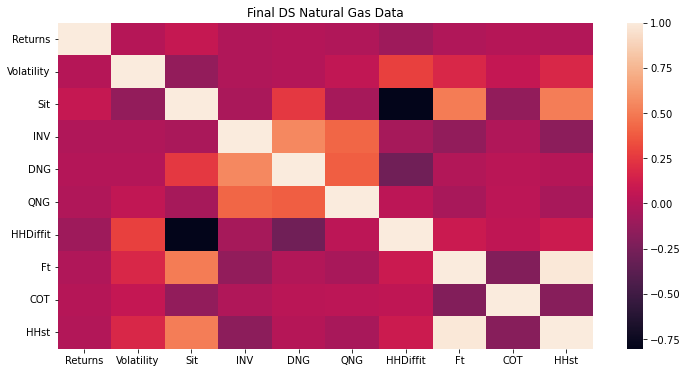

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(corrs)

plt.title('Final DS Natural Gas Data')
plt.plot()

# Begin: Cumulative plots for the entire dataset

## Histograms

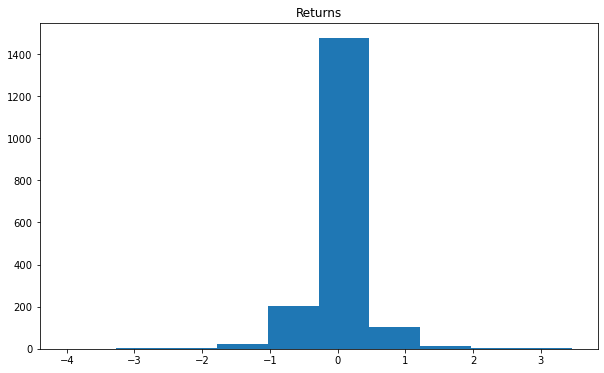

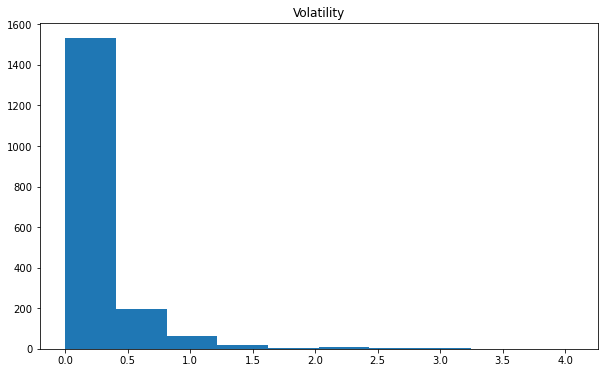

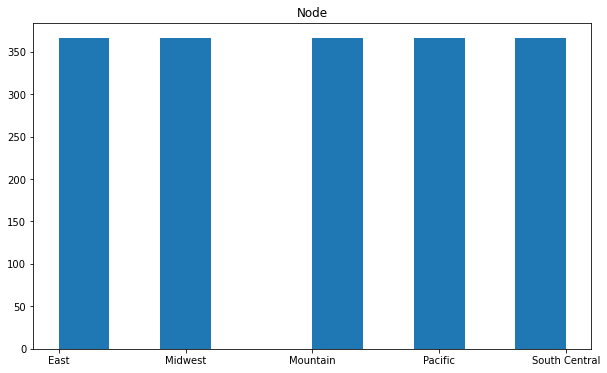

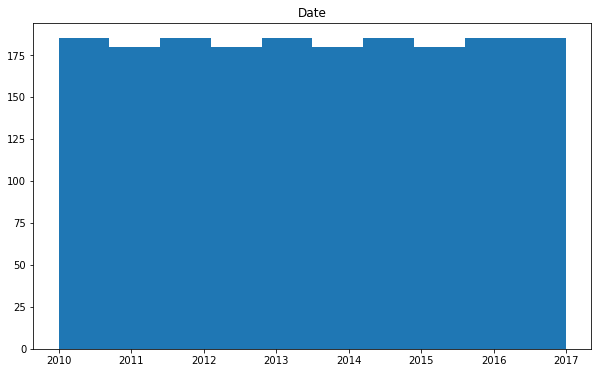

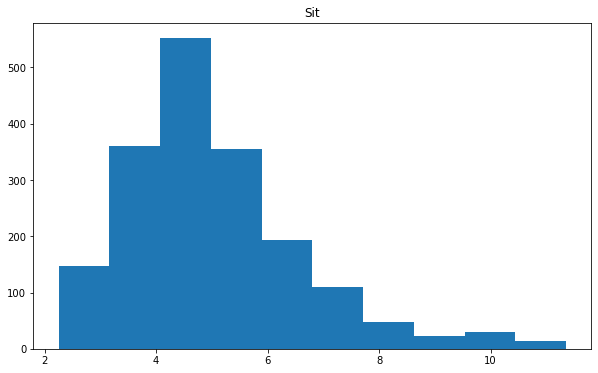

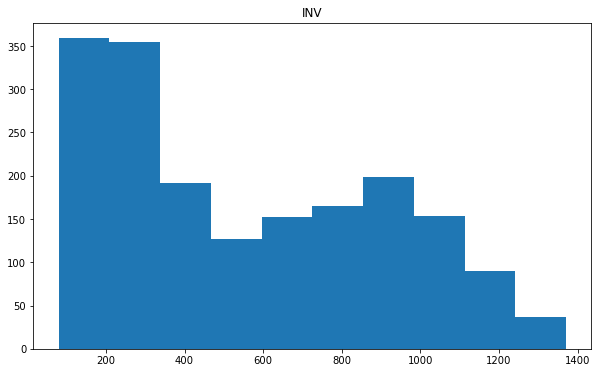

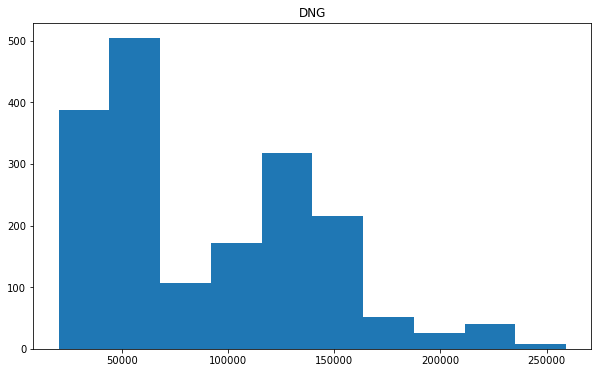

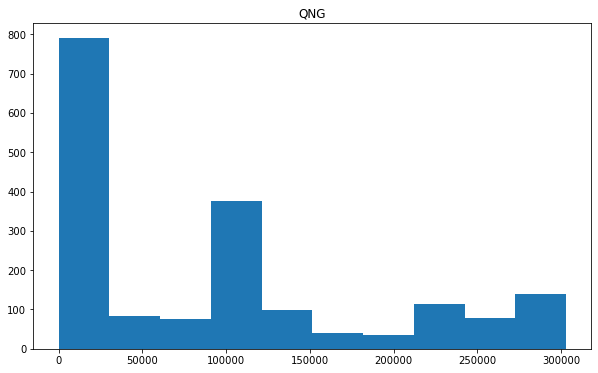

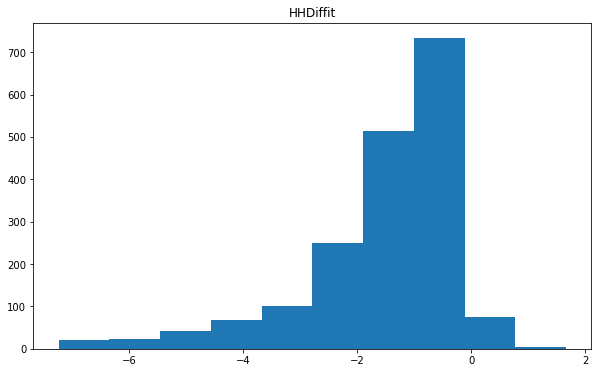

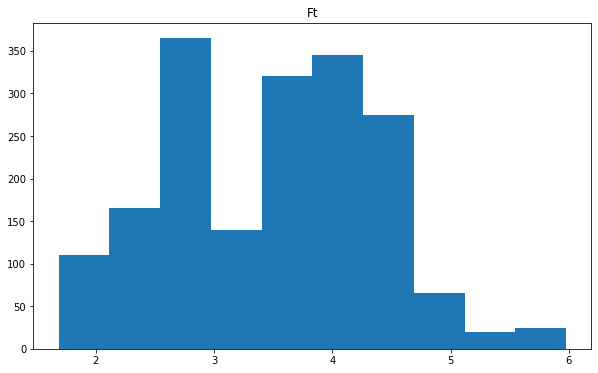

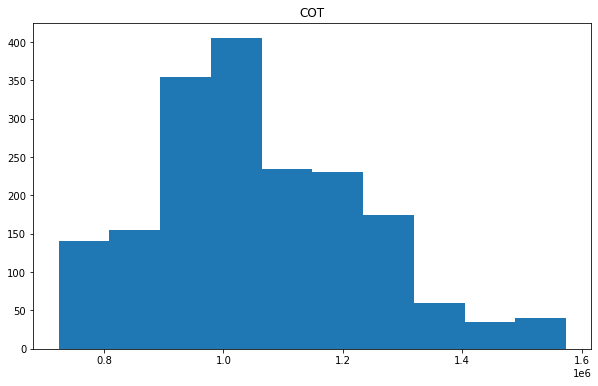

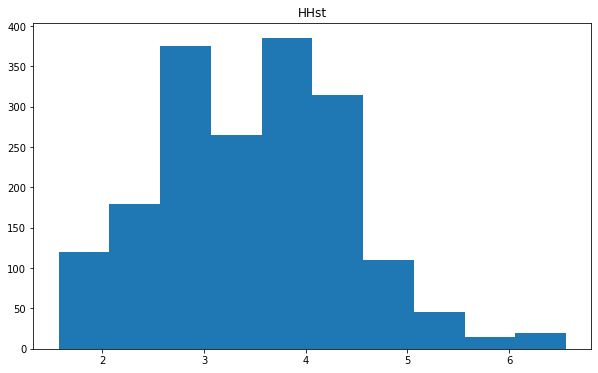

In [77]:
for col in dfnew.columns:
    plt.figure(figsize=(10,6))
    plt.hist(dfnew[col])
    plt.title(col)
    plt.show()
    print()

# Line Plots

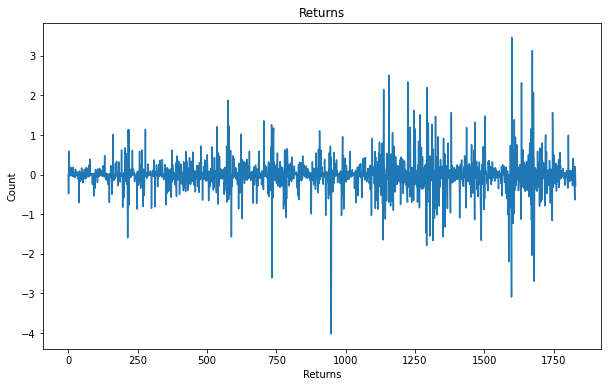

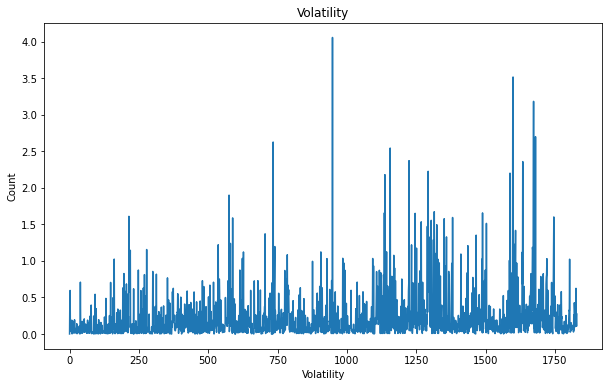

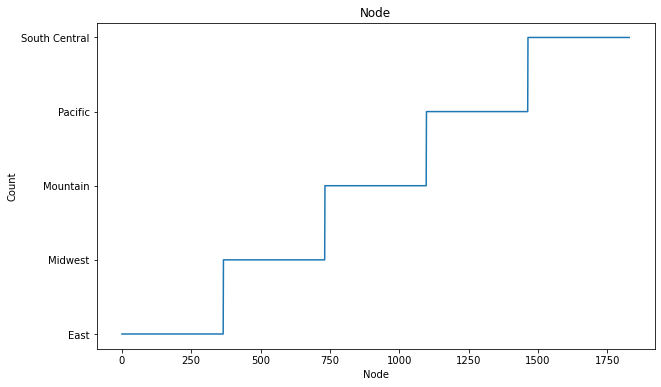

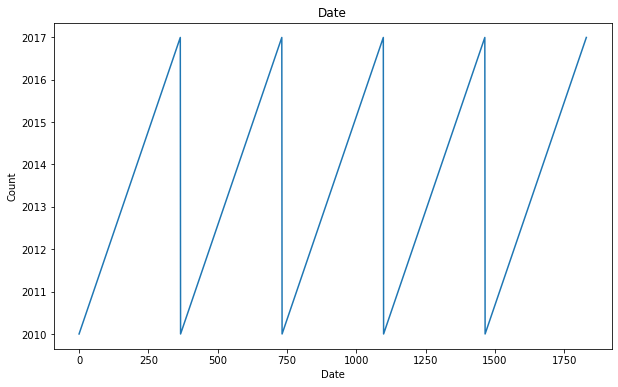

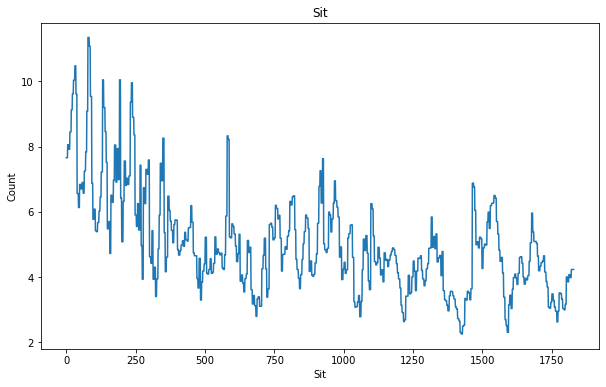

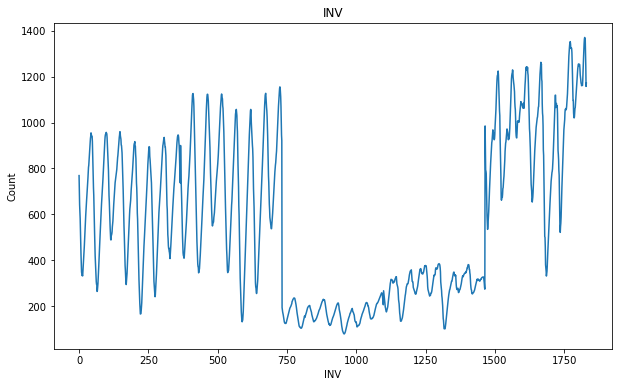

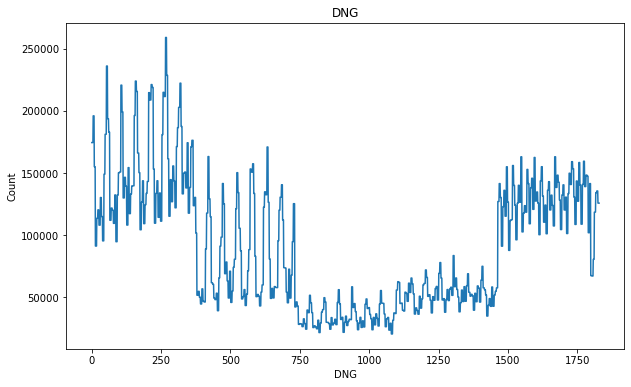

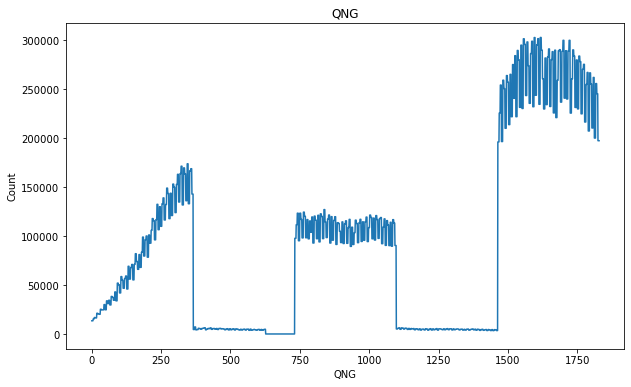

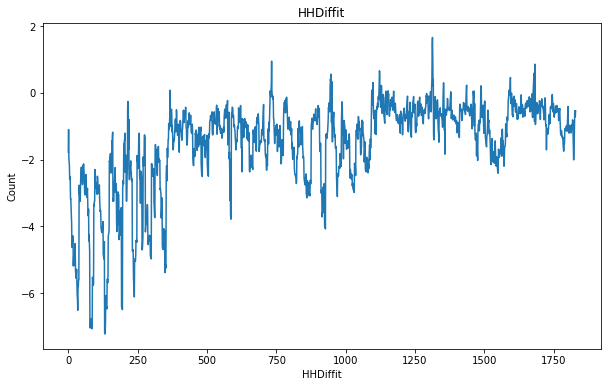

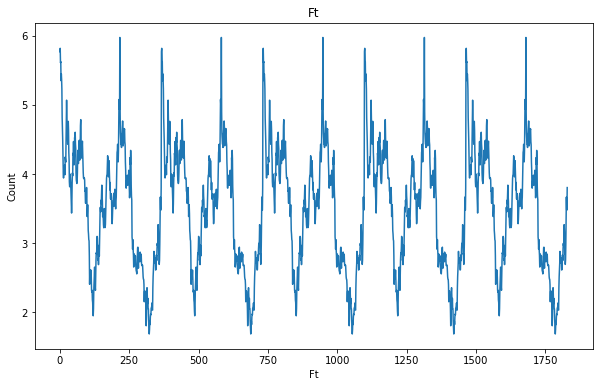

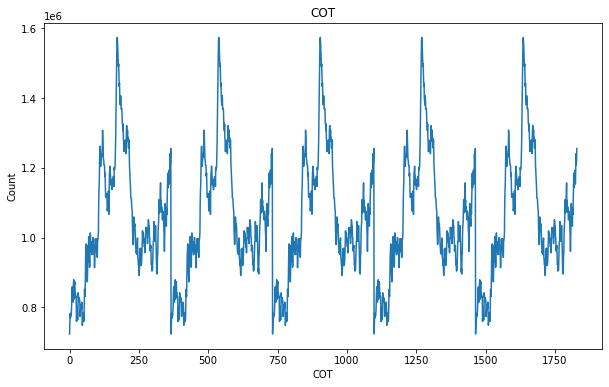

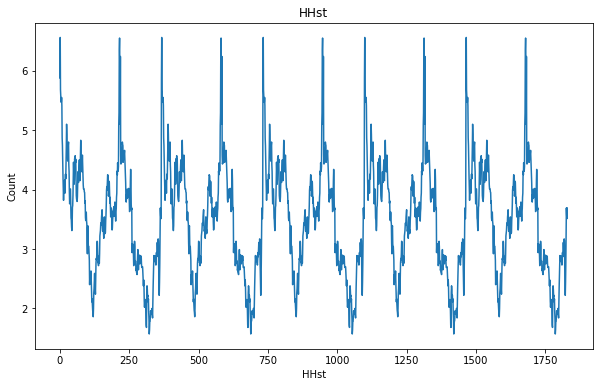

In [78]:
for col in dfnew.columns: 
    plt.figure(figsize=(10,6))
    plt.plot(dfnew[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print()

# Box plots

In [83]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [84]:
test_df.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'dngt', 'icot', 'idng'],
      dtype='object')

In [85]:
train_df.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'dngt', 'icot', 'idng'],
      dtype='object')

In [80]:
cols_date = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

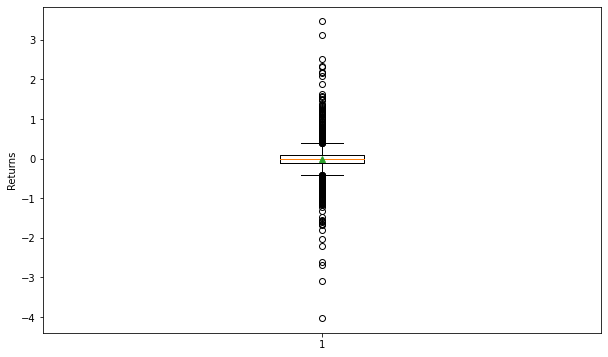

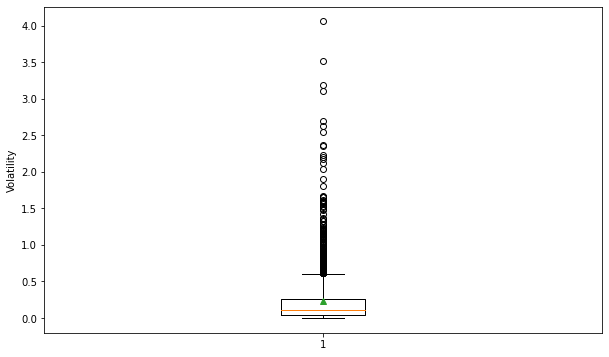

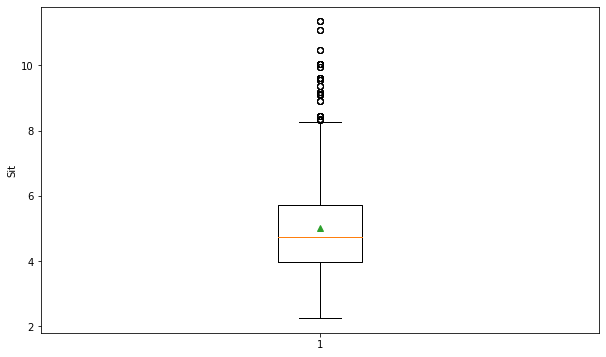

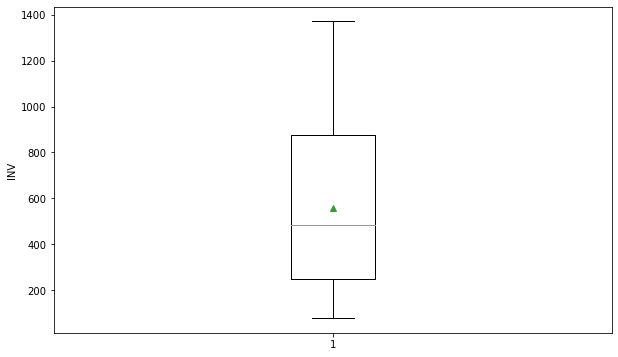

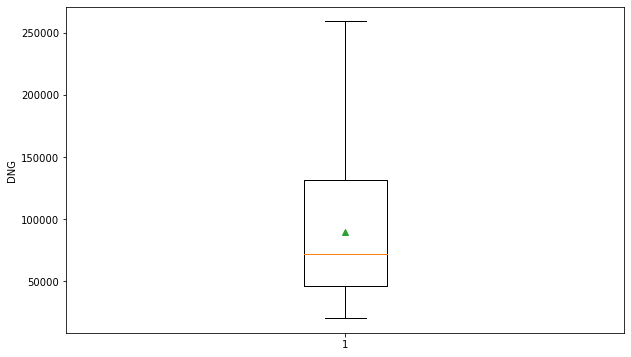

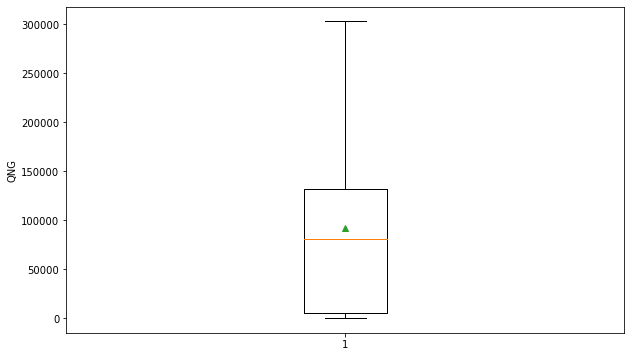

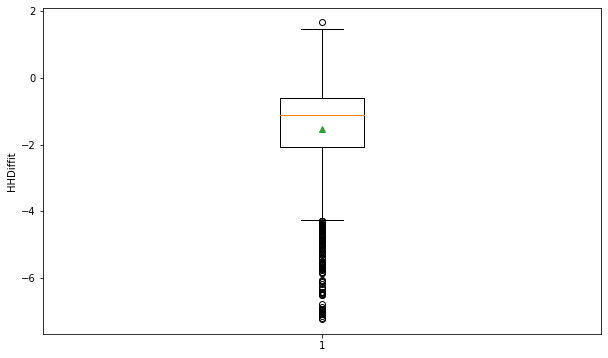

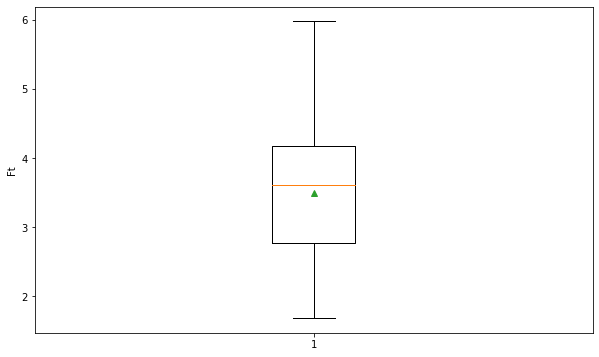

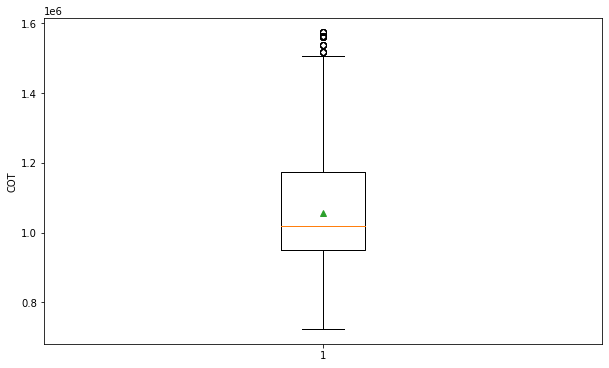

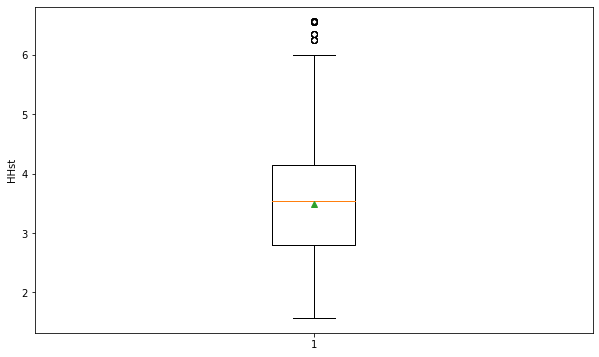

In [81]:
# to create a boxplot of all the columns in the dataset
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.boxplot(dfnew[col], showmeans=True)
    plt.ylabel(col)
    plt.show()

# End

In [86]:
dfnew.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst  
0     -1.78  5.770  724087  5.88  
1     -1.10  5.818  760159  6.56  
2     -1.98  5.610  782549  5.68  
3     -2.10  5.625  769887  5.56  
4     -2.19  5.350  782673  5.47

In [87]:
df_clean.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst  Node_Midwest  Node_Mountain  Node_Pacific  \
0     -1.78  5.770  724087  5.88             0              0             0   
1     -1.10  5.818  760159  6.56             0              0             0   
2     -1.98  5.610  782549  5.68             0              0             0   
3     -2.10  5.625  769887  5.56             0              0             0   
4     -2.19  5.350  782673  5.47             0              0             0   

   Node_South Central  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [89]:
train_df.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst         dngt         icot        idng  
0     -1.78  5.770  724087  5.88  134171428.8   941.595579  226.885826  
1     -1.10  5.818  760159  6.56  122656065.6  1081.307255  248.186629  
2     -1.98  5.610  782549  5.68  112013078.4  1218.923676  271.768224  
3     -2.10  5.625  769887  5.56  107476723.2  1249.816558  283.238961  
4     -2.19  5.350  782673  5.47  101544566.4  1344.798969  299.785567

In [90]:
test_df.head()

Returns  Volatility  Node       Date   Sit  INV       DNG       QNG  \
313 -0.812268    0.818367  East 2016-01-01  3.93  857  202858.0  134828.4   
314 -0.068563    0.067406  East 2016-01-08  3.93  802  202858.0  134828.4   
315  0.037979    0.040176  East 2016-01-15  3.93  758  202858.0  134828.4   
316  0.071887    0.074414  East 2016-01-22  3.93  695  202858.0  134828.4   
317 -0.011628    0.009916  East 2016-01-29  3.93  641  202858.0  134828.4   

     HHDiffit     Ft     COT  HHst         dngt         icot        idng  
313     -1.66  2.288  935925  2.27  173849306.0  1092.094516  236.707118  
314     -1.55  2.356  901080  2.38  162692116.0  1123.541147  252.940150  
315     -1.61  2.232  911328  2.32  153766364.0  1202.279683  267.622691  
316     -1.73  2.122  895870  2.20  140986310.0  1289.021583  291.882014  
317     -1.71  2.201  947373  2.22  130031978.0  1477.960998  316.471139

In [ ]:
plt.figure(figsize=(15,9))

plt.scatter(dfnew.mpg, df_sub.horsepower, color="#003459", label="Horsepower")
plt.scatter(df_sub.mpg, df_sub.displacement, color="purple", label="Displacement")

plt.legend()

plt.show()

In [ ]:
## Create plots for all Nodes

# Begin: Create the df for the analysis

In [93]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [95]:
df_clean.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'Node_Midwest', 'Node_Mountain',
       'Node_Pacific', 'Node_South Central'],
      dtype='object')

In [96]:
dfnew.shape

(1830, 12)

In [108]:
df_clean.shape

(1830, 19)

In [109]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Returns             1830 non-null   float64       
 1   Volatility          1830 non-null   float64       
 2   Node                1830 non-null   object        
 3   Date                1830 non-null   datetime64[ns]
 4   Sit                 1830 non-null   float64       
 5   INV                 1830 non-null   int64         
 6   DNG                 1830 non-null   float64       
 7   QNG                 1830 non-null   float64       
 8   HHDiffit            1830 non-null   float64       
 9   Ft                  1830 non-null   float64       
 10  COT                 1830 non-null   int64         
 11  HHst                1830 non-null   float64       
 12  Node_Midwest        1830 non-null   uint8         
 13  Node_Mountain       1830 non-null   uint8       

In [ ]:
## Do a df_clean.fillna

In [99]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1830 non-null   float64       
 1   Volatility  1830 non-null   float64       
 2   Node        1830 non-null   object        
 3   Date        1830 non-null   datetime64[ns]
 4   Sit         1830 non-null   float64       
 5   INV         1830 non-null   int64         
 6   DNG         1830 non-null   float64       
 7   QNG         1830 non-null   float64       
 8   HHDiffit    1830 non-null   float64       
 9   Ft          1830 non-null   float64       
 10  COT         1830 non-null   int64         
 11  HHst        1830 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 171.7+ KB


In [ ]:
## These came first
## Create the columns for "icot", "dngt", "idng".

In [105]:
df_clean["icot"] = (df_clean['COT']/df_clean['INV'])

In [106]:
df_clean["dngt"] = (df_clean['DNG']*df_clean['INV'])

In [107]:
df_clean["idng"] = (df_clean['DNG']/train_df['INV'])

In [110]:
## Create new columns

In [111]:
test_df = df_clean.loc[(df_clean.Date >= datetime.datetime(2016,1,1)) & (df_clean.Date <= datetime.datetime(2016,12,30))]

In [112]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 313 to 1829
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Returns             265 non-null    float64       
 1   Volatility          265 non-null    float64       
 2   Node                265 non-null    object        
 3   Date                265 non-null    datetime64[ns]
 4   Sit                 265 non-null    float64       
 5   INV                 265 non-null    int64         
 6   DNG                 265 non-null    float64       
 7   QNG                 265 non-null    float64       
 8   HHDiffit            265 non-null    float64       
 9   Ft                  265 non-null    float64       
 10  COT                 265 non-null    int64         
 11  HHst                265 non-null    float64       
 12  Node_Midwest        265 non-null    uint8         
 13  Node_Mountain       265 non-null    uint8      

In [113]:
train_df = df_clean.loc[(df_clean.Date >= datetime.datetime(2010,1,1)) & (df_clean.Date <= datetime.datetime(2015,12,30))]

In [114]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1776
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Returns             1565 non-null   float64       
 1   Volatility          1565 non-null   float64       
 2   Node                1565 non-null   object        
 3   Date                1565 non-null   datetime64[ns]
 4   Sit                 1565 non-null   float64       
 5   INV                 1565 non-null   int64         
 6   DNG                 1565 non-null   float64       
 7   QNG                 1565 non-null   float64       
 8   HHDiffit            1565 non-null   float64       
 9   Ft                  1565 non-null   float64       
 10  COT                 1565 non-null   int64         
 11  HHst                1565 non-null   float64       
 12  Node_Midwest        1565 non-null   uint8         
 13  Node_Mountain       1565 non-null   uint8       

# End

In [15]:
colsM = ['Returns',
 'Volatility',
 'Sit',
 'INV',
 'DNG',
 'QNG',
 'HHDiffit',
 'Ft',
 'COT',
 'HHst']

In [16]:
dfModel = dfnew.loc[:, colsM]

In [17]:
# rename all my columns
dfModel = dfnew.rename(columns={"Returns":"Returns", "Volatility":"Volatility","Node":"Node","Sit":"Sit",
                             "INV":"INV", "DNG":"DNG", "QNG":"QNG",
                             "HHDiffit":"HHDiffit", "Ft":"Ft", "COT":"COT", "HHST":"HHST"})

In [18]:
dfModel.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst  
0     -1.78  5.770  724087  5.88  
1     -1.10  5.818  760159  6.56  
2     -1.98  5.610  782549  5.68  
3     -2.10  5.625  769887  5.56  
4     -2.19  5.350  782673  5.47

# Begin "One-Hot Encoding"

In [19]:
# linear model, drop_first=True
# One Hot Encode, columns with less than 10 categories.
cols_oh = ["Node"]
df_oh = pd.get_dummies(dfModel.loc[:, cols_oh], drop_first=True)
df_oh.head(100)

Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central
0              0              0             0                   0
1              0              0             0                   0
2              0              0             0                   0
3              0              0             0                   0
4              0              0             0                   0
5              0              0             0                   0
6              0              0             0                   0
7              0              0             0                   0
8              0              0             0                   0
9              0              0             0                   0
10             0              0             0                   0
11             0              0             0                   0
12             0              0             0                   0
13             0              0             0                   0
14             0              0             0                   0
15             0              0             0                   0
16             0              0             0                   0
17             0              0             0                   0
18             0              0             0                   0
19             0              0             0                   0
20             0              0             0                   0
21             0              0             0                   0
22             0              0             0                   0
23             0              0             0                   0
24             0              0             0                   0
25             0              0             0                   0
26             0              0             0                   0
27             0              0             0                   0
28             0              0             0                   0
29             0              0             0                   0
30             0              0             0                   0
31             0              0             0                   0
32             0              0             0                   0
33             0              0             0                   0
34             0              0             0                   0
35             0              0             0                   0
36             0              0             0                   0
37             0              0             0                   0
38             0              0             0                   0
39             0              0             0                   0
40             0              0             0                   0
41             0              0             0                   0
42             0              0             0                   0
43             0              0             0                   0
44             0              0             0                   0
45             0              0             0                   0
46             0              0             0                   0
47             0              0             0                   0
48             0              0             0                   0
49             0              0             0                   0
50             0              0             0                   0
51             0              0             0                   0
52             0              0             0                   0
53             0              0             0                   0
54             0              0             0                   0
55             0              0             0                   0
56             0              0             0                   0
57             0              0             0                   0
58             0              0             0                   0
59             0              0             

In [20]:
# Combine all the columns back into one dataframe
df_clean = pd.concat([dfModel, df_oh], axis=1)
df_clean.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst  Node_Midwest  Node_Mountain  Node_Pacific  \
0     -1.78  5.770  724087  5.88             0              0             0   
1     -1.10  5.818  760159  6.56             0              0             0   
2     -1.98  5.610  782549  5.68             0              0             0   
3     -2.10  5.625  769887  5.56             0              0             0   
4     -2.19  5.350  782673  5.47             0              0             0   

   Node_South Central  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0


# End "One-Hot Encoding"

In [53]:
corrs_clean = df_clean.corr()

In [54]:
corrs_clean

Returns  Volatility       Sit       INV       DNG  \
Returns             1.000000    0.002274  0.076218 -0.016444 -0.004983   
Volatility          0.002274    1.000000 -0.141232 -0.018485 -0.005424   
Sit                 0.076218   -0.141232  1.000000 -0.049910  0.247112   
INV                -0.016444   -0.018485 -0.049910  1.000000  0.553788   
DNG                -0.004983   -0.005424  0.247112  0.553788  1.000000   
QNG                -0.020101    0.048650 -0.061842  0.420146  0.391351   
HHDiffit           -0.094775    0.281353 -0.804160 -0.058615 -0.283760   
Ft                 -0.019239    0.168538  0.503202 -0.148005 -0.010827   
COT                -0.000536    0.066878 -0.147051 -0.021293  0.021907   
HHst               -0.009858    0.171541  0.507488 -0.168477  0.002130   
Node_Midwest        0.008029   -0.048826 -0.100889  0.237634 -0.063054   
Node_Mountain       0.000237   -0.043711  0.005129 -0.562203 -0.540944   
Node_Pacific       -0.001039    0.139372 -0.317758 -0.389601 -0.363208   
Node_South Central -0.012945    0.101520 -0.209716  0.594238  0.359448   

                         QNG  HHDiffit            Ft           COT  \
Returns            -0.020101 -0.094775 -1.923853e-02 -5.364505e-04   
Volatility          0.048650  0.281353  1.685383e-01  6.687803e-02   
Sit                -0.061842 -0.804160  5.032017e-01 -1.470509e-01   
INV                 0.420146 -0.058615 -1.480047e-01 -2.129297e-02   
DNG                 0.391351 -0.283760 -1.082699e-02  2.190653e-02   
QNG                 1.000000  0.034444 -5.642364e-02  3.404682e-02   
HHDiffit            0.034444  1.000000  9.666881e-02  4.253866e-02   
Ft                 -0.056424  0.096669  1.000000e+00 -2.072994e-01   
COT                 0.034047  0.042539 -2.072994e-01  1.000000e+00   
HHst               -0.053544  0.104079  9.820863e-01 -1.843811e-01   
Node_Midwest       -0.459353  0.116451  1.785198e-15 -2.315034e-15   
Node_Mountain       0.081639 -0.005920 -1.140008e-15 -1.296914e-15   
Node_Pacific       -0.452860  0.366772 -2.040456e-15  2.745899e-15   
Node_South Central  0.856087  0.242065 -3.824175e-15  4.222274e-15   

                            HHst  Node_Midwest  Node_Mountain  Node_Pacific  \
Returns            -9.858435e-03  8.029177e-03   2.365151e-04 -1.038786e-03   
Volatility          1.715410e-01 -4.882609e-02  -4.371063e-02  1.393719e-01   
Sit                 5.074880e-01 -1.008890e-01   5.128559e-03 -3.177578e-01   
INV                -1.684768e-01  2.376344e-01  -5.622025e-01 -3.896014e-01   
DNG                 2.130041e-03 -6.305373e-02  -5.409438e-01 -3.632084e-01   
QNG                -5.354408e-02 -4.593527e-01   8.163854e-02 -4.528595e-01   
HHDiffit            1.040791e-01  1.164511e-01  -5.919636e-03  3.667717e-01   
Ft                  9.820863e-01  1.785198e-15  -1.140008e-15 -2.040456e-15   
COT                -1.843811e-01 -2.315034e-15  -1.296914e-15  2.745899e-15   
HHst                1.000000e+00 -1.407320e-15   9.073105e-16  1.408627e-15   
Node_Midwest       -1.407320e-15  1.000000e+00  -2.500000e-01 -2.500000e-01   
Node_Mountain       9.073105e-16 -2.500000e-01   1.000000e+00 -2.500000e-01   
Node_Pacific        1.408627e-15 -2.500000e-01  -2.500000e-01  1.000000e+00   
Node_South Central  1.099453e-15 -2.500000e-01  -2.500000e-01 -2.500000e-01   

                    Node_South Central  
Returns                  -1.294475e-02  
Volatility                1.015204e-01  
Sit                      -2.097160e-01  
INV                       5.942377e-01  
DNG                       3.594484e-01  
QNG                       8.560867e-01  
HHDiffit                  2.420646e-01  
Ft                       -3.824175e-15  
COT                       4.222274e-15  
HHst                      1.099453e-15  
Node_Midwest             -2.500000e-01  
Node_Mountain            -2.500000e-01  
Node_Pacific             -2.500000e-01  
Node_South Central        1.000000e+00

[]

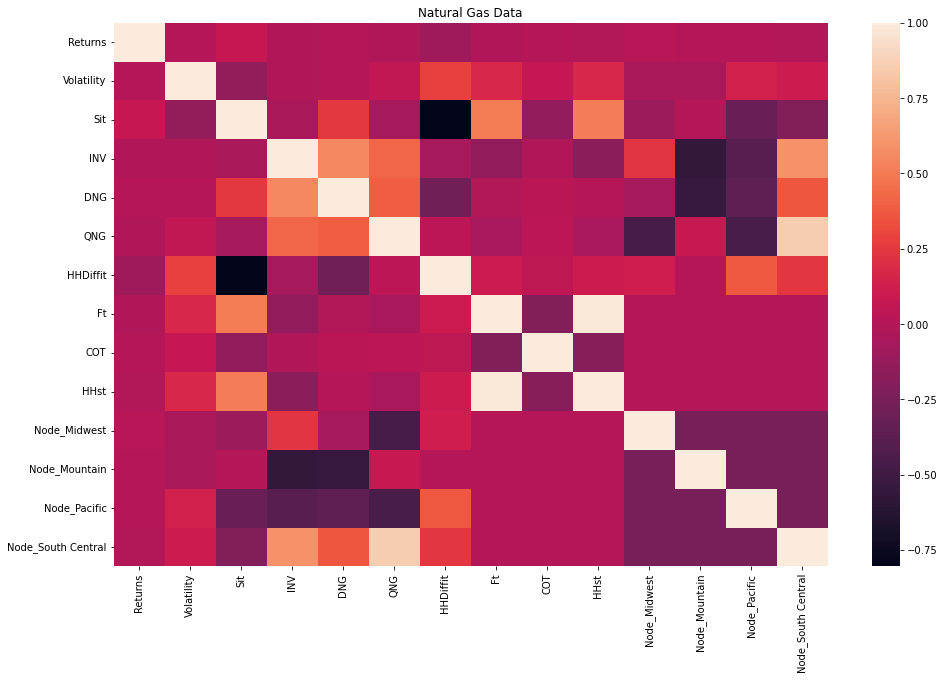

In [58]:
plt.figure(figsize=(16,10))
sns.heatmap(corrs_clean)

plt.title('Natural Gas Data')
plt.plot()

In [21]:
df_clean.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'Node_Midwest', 'Node_Mountain',
       'Node_Pacific', 'Node_South Central'],
      dtype='object')

In [59]:
# Feature engineering, column selection.
# One must use ALL ONE-HOT ENCODED COLUMNS, one cannot simply use one column and leave the rest.
abs(df_clean.corr()["HHst"]).sort_values(ascending=False)

HHst                  1.000000e+00
Ft                    9.820863e-01
Sit                   5.074880e-01
COT                   1.843811e-01
Volatility            1.715410e-01
INV                   1.684768e-01
HHDiffit              1.040791e-01
QNG                   5.354408e-02
Returns               9.858435e-03
DNG                   2.130041e-03
Node_Pacific          1.408627e-15
Node_Midwest          1.407320e-15
Node_South Central    1.099453e-15
Node_Mountain         9.073105e-16
Name: HHst, dtype: float64

# Machine Learning 

In [23]:
# test_df
# train_df
# df_clean

In [24]:
# Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
#        'HHDiffit', 'Ft', 'COT', 'HHst', 'Node_Midwest', 'Node_Mountain',
#        'Node_Pacific', 'Node_South Central'],
#       dtype='object')

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 313 to 1829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     265 non-null    float64       
 1   Volatility  265 non-null    float64       
 2   Node        265 non-null    object        
 3   Date        265 non-null    datetime64[ns]
 4   Sit         265 non-null    float64       
 5   INV         265 non-null    int64         
 6   DNG         265 non-null    float64       
 7   QNG         265 non-null    float64       
 8   HHDiffit    265 non-null    float64       
 9   Ft          265 non-null    float64       
 10  COT         265 non-null    int64         
 11  HHst        265 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 26.9+ KB


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1776
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1565 non-null   float64       
 1   Volatility  1565 non-null   float64       
 2   Node        1565 non-null   object        
 3   Date        1565 non-null   datetime64[ns]
 4   Sit         1565 non-null   float64       
 5   INV         1565 non-null   int64         
 6   DNG         1565 non-null   float64       
 7   QNG         1565 non-null   float64       
 8   HHDiffit    1565 non-null   float64       
 9   Ft          1565 non-null   float64       
 10  COT         1565 non-null   int64         
 11  HHst        1565 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 158.9+ KB


In [119]:
test_df.head()

Returns  Volatility  Node       Date   Sit  INV       DNG       QNG  \
313 -0.812268    0.818367  East 2016-01-01  3.93  857  202858.0  134828.4   
314 -0.068563    0.067406  East 2016-01-08  3.93  802  202858.0  134828.4   
315  0.037979    0.040176  East 2016-01-15  3.93  758  202858.0  134828.4   
316  0.071887    0.074414  East 2016-01-22  3.93  695  202858.0  134828.4   
317 -0.011628    0.009916  East 2016-01-29  3.93  641  202858.0  134828.4   

     HHDiffit     Ft     COT  HHst  Node_Midwest  Node_Mountain  Node_Pacific  \
313     -1.66  2.288  935925  2.27             0              0             0   
314     -1.55  2.356  901080  2.38             0              0             0   
315     -1.61  2.232  911328  2.32             0              0             0   
316     -1.73  2.122  895870  2.20             0              0             0   
317     -1.71  2.201  947373  2.22             0              0             0   

     Node_South Central         icot         dngt  idng  
313                   0  1092.094516  173849306.0   NaN  
314                   0  1123.541147  162692116.0   NaN  
315                   0  1202.279683  153766364.0   NaN  
316                   0  1289.021583  140986310.0   NaN  
317                   0  1477.960998  130031978.0   NaN

In [120]:
train_df.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst  Node_Midwest  Node_Mountain  Node_Pacific  \
0     -1.78  5.770  724087  5.88             0              0             0   
1     -1.10  5.818  760159  6.56             0              0             0   
2     -1.98  5.610  782549  5.68             0              0             0   
3     -2.10  5.625  769887  5.56             0              0             0   
4     -2.19  5.350  782673  5.47             0              0             0   

   Node_South Central         icot         dngt        idng  
0                   0   941.595579  134171428.8  226.885826  
1                   0  1081.307255  122656065.6  248.186629  
2                   0  1218.923676  112013078.4  271.768224  
3                   0  1249.816558  107476723.2  283.238961  
4                   0  1344.798969  101544566.4  299.785567

In [124]:
train_df.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'Node_Midwest', 'Node_Mountain',
       'Node_Pacific', 'Node_South Central', 'icot', 'dngt', 'idng'],
      dtype='object')

In [125]:
test_df.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'Node_Midwest', 'Node_Mountain',
       'Node_Pacific', 'Node_South Central', 'icot', 'dngt', 'idng'],
      dtype='object')

In [126]:
# jkeme, NULL analysis

mask = pd.isnull(df_clean)
mask

Returns  Volatility   Node   Date    Sit    INV    DNG    QNG  HHDiffit  \
0       False       False  False  False  False  False  False  False     False   
1       False       False  False  False  False  False  False  False     False   
2       False       False  False  False  False  False  False  False     False   
3       False       False  False  False  False  False  False  False     False   
4       False       False  False  False  False  False  False  False     False   
5       False       False  False  False  False  False  False  False     False   
6       False       False  False  False  False  False  False  False     False   
7       False       False  False  False  False  False  False  False     False   
8       False       False  False  False  False  False  False  False     False   
9       False       False  False  False  False  False  False  False     False   
10      False       False  False  False  False  False  False  False     False   
11      False       False  False  False  False  False  False  False     False   
12      False       False  False  False  False  False  False  False     False   
13      False       False  False  False  False  False  False  False     False   
14      False       False  False  False  False  False  False  False     False   
15      False       False  False  False  False  False  False  False     False   
16      False       False  False  False  False  False  False  False     False   
17      False       False  False  False  False  False  False  False     False   
18      False       False  False  False  False  False  False  False     False   
19      False       False  False  False  False  False  False  False     False   
20      False       False  False  False  False  False  False  False     False   
21      False       False  False  False  False  False  False  False     False   
22      False       False  False  False  False  False  False  False     False   
23      False       False  False  False  False  False  False  False     False   
24      False       False  False  False  False  False  False  False     False   
25      False       False  False  False  False  False  False  False     False   
26      False       False  False  False  False  False  False  False     False   
27      False       False  False  False  False  False  False  False     False   
28      False       False  False  False  False  False  False  False     False   
29      False       False  False  False  False  False  False  False     False   
30      False       False  False  False  False  False  False  False     False   
31      False       False  False  False  False  False  False  False     False   
32      False       False  False  False  False  False  False  False     False   
33      False       False  False  False  False  False  False  False     False   
34      False       False  False  False  False  False  False  False     False   
35      False       False  False  False  False  False  False  False     False   
36      False       False  False  False  False  False  False  False     False   
37      False       False  False  False  False  False  False  False     False   
38      False       False  False  False  False  False  False  False     False   
39      False       False  False  False  False  False  False  False     False   
40      False       False  False  False  False  False  False  False     False   
41      False       False  False  False  False  False  False  False     False   
42      False       False  False  False  False  False  False  False     False   
43      False       False  False  False  False  False  False  False     False   
44      False       False  False  False  False  False  False  False     False   
45      False       False  False  False  False  False  False  False     False   
46      False       False  False  False  False  False  False  False     False   
47      False       False  False  False  False  False  False  False     False   
48      False       False  False  Fal

In [128]:
df_clean.loc[:, mask]

ValueError: Cannot index with multidimensional key

In [27]:
# Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
#        'HHDiffit', 'Ft', 'COT', 'HHst', 'Node_Midwest', 'Node_Mountain',
#        'Node_Pacific', 'Node_South Central'],
#       dtype='object')

In [116]:
## 060922 1546CST

In [121]:
X_train = train_df.drop(["HHst", "Date", "Node"], axis=1).values
y_train = train_df["HHst"].values

X_test = test_df.drop(["HHst", "Date", "Node"], axis=1).values
y_test = test_df["HHst"].values

In [122]:
# Initialize the model
model1 = LinearRegression()

# FIT THE MODEL
model1.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model1.predict(X_train)
test_preds = model1.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_train = mean_squared_error(y_train, train_preds)
r2_train = r2_score(y_train, train_preds)
mae_train = mean_absolute_error(y_train, train_preds)

print(f"mean squared error (MSE): {mse_train}")
print(f"R-squared (R2 ): {r2_train}")
print(f"MAE {mae_train}")

# We cannot evaluate the metrics {Score the prediction with MSE and R2} unless we have our expected output
# from the {train_preds and test_preds}

print()

# PRINT the METRICS
print("Testing SET")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_test = mean_squared_error(y_test, test_preds)
r2_test = r2_score(y_test, test_preds)
mae_test = mean_absolute_error(y_test, test_preds)

print(f"mean squared error (MSE): {mse_test}")
print(f"R-squared (R2 ): {r2_test}")
print(f"MAE {mae_test}")

# Compare the {evaluation_metrics} to test for overfitting
# Testing set is more important because the goal is to see how the model performs on unseen data.
# Run a new model with the goal of outperforming the Test Set evaluation metrics.

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [123]:
# Initialize the model
model1 = Lasso()

# FIT THE MODEL
model1.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model1.predict(X_train)
test_preds = model1.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_train = mean_squared_error(y_train, train_preds)
r2_train = r2_score(y_train, train_preds)
mae_train = mean_absolute_error(y_train, train_preds)

print(f"mean squared error (MSE): {mse_train}")
print(f"R-squared (R2 ): {r2_train}")
print(f"MAE {mae_train}")

# We cannot evaluate the metrics {Score the prediction with MSE and R2} unless we have our expected output
# from the {train_preds and test_preds}

print()

# PRINT the METRICS
print("Testing SET")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_test = mean_squared_error(y_test, test_preds)
r2_test = r2_score(y_test, test_preds)
mae_test = mean_absolute_error(y_test, test_preds)

print(f"mean squared error (MSE): {mse_test}")
print(f"R-squared (R2 ): {r2_test}")
print(f"MAE {mae_test}")

# Compare the {evaluation_metrics} to test for overfitting
# Testing set is more important because the goal is to see how the model performs on unseen data.
# Run a new model with the goal of outperforming the Test Set evaluation metrics.

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [31]:
# Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
#        'HHDiffit', 'Ft', 'COT', 'HHst', 'Node_Midwest', 'Node_Mountain',
#        'Node_Pacific', 'Node_South Central'],
#       dtype='object')

In [32]:
X_train_ret = train_df.drop(["HHst", "Date", "Node", "Returns"], axis=1).values
y_train_ret = train_df["HHst"].values

X_test_ret = test_df.drop(["HHst", "Date", "Node", "Returns"], axis=1).values
y_test_ret = test_df["HHst"].values

In [33]:
# Initialize the model
model2 = LinearRegression()

# FIT THE MODEL
model2.fit(X_train_ret, y_train_ret)

# EVALUATE the MODEL
train_preds = model2.predict(X_train_ret)
test_preds = model2.predict(X_test_ret)

# PRINT the METRICS
print("Training Set")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_train = mean_squared_error(y_train_ret, train_preds)
r2_train = r2_score(y_train_ret, train_preds)
mae_train = mean_absolute_error(y_train_ret, train_preds)

print(f"mean squared error (MSE): {mse_train}")
print(f"R-squared (R2 ): {r2_train}")
print(f"MAE {mae_train}")

# We cannot evaluate the metrics {Score the prediction with MSE and R2} unless we have our expected output
# from the {train_preds and test_preds}

print()

# PRINT the METRICS
print("Testing Set")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_test = mean_squared_error(y_test_ret, test_preds)
r2_test = r2_score(y_test_ret, test_preds)
mae_test = mean_absolute_error(y_test_ret, test_preds)

print(f"mean squared error (MSE): {mse_test}")
print(f"R-squared (R2 ): {r2_test}")
print(f"MAE {mae_test}")

# Compare the {evaluation_metrics} to test for overfitting
# Testing set is more important because the goal is to see how the model performs on unseen data.
# Run a new model with the goal of outperforming the Test Set evaluation metrics.

Training Set
mean squared error (MSE): 4.3938046171826785e-22
R-squared (R2 ): 1.0
MAE 1.7040213471715926e-11

Testing Set
mean squared error (MSE): 1.4556483746726253e-22
R-squared (R2 ): 1.0
MAE 9.544583991085793e-12


In [34]:
# σit = βo + β1*Sit + β2* INVit + β3*DNGit + β4*QNGit + β5*DiffHHit + β6*Ft + β7*cottt + β8*dngt + β9*icot + β10*idng + εit

In [104]:
train_df["dngt"] = (train_df['DNG']*train_df['INV'])
train_df

C:\Users\BABATU~1\AppData\Local\Temp/ipykernel_2768/2553524044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["dngt"] = (train_df['DNG']*train_df['INV'])


Returns  Volatility           Node       Date    Sit   INV  \
0     0.000000e+00    0.000000           East 2010-01-01   7.66   769   
1    -4.813032e-01    0.484173           East 2010-01-08   7.66   703   
2     5.877867e-01    0.595347           East 2010-01-15   7.66   642   
3     5.884050e-02    0.061240           East 2010-01-22   7.66   616   
4     4.196420e-02    0.044199           East 2010-01-29   7.66   582   
5     1.677563e-01    0.171219           East 2010-02-05   8.06   523   
6    -3.137512e-02    0.029855           East 2010-02-12   8.06   471   
7     5.427689e-02    0.056632           East 2010-02-19   8.06   425   
8     1.854613e-01    0.189097           East 2010-02-26   8.06   390   
9    -3.140000e-03    0.001340           East 2010-03-05   7.92   349   
10    8.727340e-02    0.089951           East 2010-03-12   7.92   341   
11    6.147186e-02    0.063897           East 2010-03-19   7.92   334   
12    5.791092e-02    0.060302           East 2010-03-26   7.92   336   
13    1.690195e-01    0.172494           East 2010-04-02   8.45   333   
14   -3.965277e-02    0.038214           East 2010-04-09   8.45   358   
15   -1.357487e-02    0.011881           East 2010-04-16   8.45   376   
16    1.581954e-02    0.017800           East 2010-04-23   8.45   397   
17   -3.886203e-02    0.037415           East 2010-04-30   8.45   416   
18    1.904470e-01    0.194131           East 2010-05-07   9.13   444   
19   -4.936837e-02    0.048024           East 2010-05-14   9.13   463   
20   -1.427139e-02    0.012585           East 2010-05-21   9.13   491   
21    1.629364e-02    0.018278           East 2010-05-28   9.13   518   
22    4.541748e-02    0.047686           East 2010-06-04   9.62   545   
23   -5.761275e-02    0.056349           East 2010-06-11   9.62   571   
24   -7.868031e-02    0.077622           East 2010-06-18   9.62   596   
25    3.692059e-02    0.039107           East 2010-06-25   9.62   615   
26    1.372558e-01    0.140421           East 2010-07-02  10.04   638   
27    1.860000e-03    0.003700           East 2010-07-09  10.04   659   
28    3.105272e-02    0.033182           East 2010-07-16  10.04   681   
29   -2.919916e-02    0.027658           East 2010-07-23  10.04   698   
30   -2.058071e-02    0.018956           East 2010-07-30  10.04   716   
31    7.113299e-02    0.073653           East 2010-08-06  10.48   737   
32    6.475857e-02    0.067216           East 2010-08-13  10.48   758   
33    1.960847e-02    0.021626           East 2010-08-20  10.48   781   
34    5.355610e-02    0.055904           East 2010-08-27  10.48   805   
35   -1.084327e-01    0.107665           East 2010-09-03   9.61   814   
36   -6.860000e-03    0.005100           East 2010-09-10   9.61   835   
37   -3.681397e-02    0.035347           East 2010-09-17   9.61   856   
38    0.000000e+00    0.001826           East 2010-09-24   9.61   876   
39   -7.039193e-01    0.708961           East 2010-10-01   6.56   896   
40    9.301020e-02    0.095743           East 2010-10-08   6.56   912   
41    9.820000e-03    0.011700           East 2010-10-15   6.56   930   
42    3.834336e-02    0.040543           East 2010-10-22   6.56   940   
43    1.863408e-02    0.020642           East 2010-10-29   6.56   955   
44   -1.706971e-01    0.170537           East 2010-11-05   6.13   950   
45   -1.200667e-01    0.119412           East 2010-11-12   6.13   940   
46   -1.242252e-02    0.010718           East 2010-11-19   6.13   940   
47   -7.346715e-02    0.072358           East 2010-11-26   6.13   940   
48    1.687773e-01    0.172250           East 2010-12-03   6.84   918   
49   -1.036784e-01    0.102864           East 2010-12-10   6.84   862   
50    8.068891e-02    0.083302           East 2010-12-17   6.84   807   
51    6.381151e-02    0.066260           East 2010-12-24   6.84   756   
52   -2.578412e-02    0.024210           East 2010-12-31   6.84   715   
53   -2.064919e-01    0.206681           East 2011-01-07   6.70   684

In [36]:
test_df["dngt"] = (test_df['DNG']*test_df['INV'])
test_df

C:\Users\BABATU~1\AppData\Local\Temp/ipykernel_2768/1319765194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["dngt"] = (test_df['DNG']*test_df['INV'])


Returns  Volatility           Node       Date   Sit   INV        DNG  \
313  -0.812268    0.818367           East 2016-01-01  3.93   857  202858.00   
314  -0.068563    0.067406           East 2016-01-08  3.93   802  202858.00   
315   0.037979    0.040176           East 2016-01-15  3.93   758  202858.00   
316   0.071887    0.074414           East 2016-01-22  3.93   695  202858.00   
317  -0.011628    0.009916           East 2016-01-29  3.93   641  202858.00   
318   0.247408    0.251648           East 2016-02-05  4.30   620  222327.25   
319  -0.023096    0.021495           East 2016-02-12  4.30   568  222327.25   
320   0.097856    0.100636           East 2016-02-19  4.30   512  222327.25   
321   0.049597    0.051907           East 2016-02-26  4.30   495  222327.25   
322  -0.303943    0.305082           East 2016-03-04  3.40   464  187474.75   
323  -0.039002    0.037557           East 2016-03-11  3.40   452  187474.75   
324  -0.089080    0.088123           East 2016-03-18  3.40   453  187474.75   
325   0.000000    0.001826           East 2016-03-25  3.40   439  187474.75   
326   0.256134    0.260458           East 2016-04-01  3.94   434  133185.40   
327  -0.049271    0.047926           East 2016-04-08  3.94   419  133185.40   
328   0.029853    0.031970           East 2016-04-15  3.94   408  133185.40   
329  -0.004910    0.003140           East 2016-04-22  3.94   431  133185.40   
330  -0.004940    0.003160           East 2016-04-29  3.94   454  133185.40   
331   0.361613    0.366967           East 2016-05-06  4.86   468  149864.75   
332  -0.013889    0.012199           East 2016-05-13  4.86   490  149864.75   
333   0.037740    0.039934           East 2016-05-20  4.86   511  149864.75   
334   0.016695    0.018684           East 2016-05-27  4.86   537  149864.75   
335   0.216499    0.220437           East 2016-06-03  5.90   559  150728.25   
336  -0.057629    0.056366           East 2016-06-10  5.90   585  150728.25   
337  -0.067179    0.066008           East 2016-06-17  5.90   612  150728.25   
338  -0.049546    0.048203           East 2016-06-24  5.90   632  150728.25   
339   0.378654    0.384174           East 2016-07-01  7.49   654  137953.20   
340   0.015103    0.017076           East 2016-07-08  7.49   678  137953.20   
341   0.002140    0.003990           East 2016-07-15  7.49   697  137953.20   
342   0.004260    0.006130           East 2016-07-22  7.49   715  137953.20   
343  -0.012848    0.011148           East 2016-07-29  7.49   729  137953.20   
344  -0.131071    0.130524           East 2016-08-05  6.95   746  174320.75   
345   0.026668    0.028754           East 2016-08-12  6.95   763  174320.75   
346   0.009520    0.011400           East 2016-08-19  6.95   775  174320.75   
347  -0.021558    0.019942           East 2016-08-26  6.95   796  174320.75   
348   0.253196    0.257492           East 2016-09-02  8.26   812  117619.80   
349   0.013072    0.015025           East 2016-09-09  8.26   832  117619.80   
350  -0.028224    0.026673           East 2016-09-16  8.26   851  117619.80   
351  -0.017325    0.015668           East 2016-09-23  8.26   874  117619.80   
352   0.019231    0.021245           East 2016-09-30  8.26   899  117619.80   
353  -0.762140    0.767750           East 2016-10-07  5.36   913  138413.50   
354  -0.112186    0.111455           East 2016-10-14  5.36   925  138413.50   
355   0.013606    0.015564           East 2016-10-21  5.36   939  138413.50   
356   0.173272    0.176788           East 2016-10-28  5.36   940  138413.50   
357  -0.463961    0.466662           East 2016-11-04  4.16   946  171082.00   
358   0.155870    0.159217           East 2016-11-11  4.16   944  171082.00   
359  -0.120364    0.119712           East 2016-11-18  4.16   935  171082.00   
360  -0.205852    0.206035           East 2016-11-25  4.16   912  171082.00   
361   0.000000    0.001826           East 2016-12-02  4.61   899  176305.80   
362  -0.419854    0.422124           East 2016-12-09  4.6

In [37]:
train_df["icot"] = (train_df['COT']/train_df['INV'])
train_df

C:\Users\BABATU~1\AppData\Local\Temp/ipykernel_2768/3596038722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["icot"] = (train_df['COT']/train_df['INV'])


Returns  Volatility           Node       Date    Sit   INV  \
0     0.000000e+00    0.000000           East 2010-01-01   7.66   769   
1    -4.813032e-01    0.484173           East 2010-01-08   7.66   703   
2     5.877867e-01    0.595347           East 2010-01-15   7.66   642   
3     5.884050e-02    0.061240           East 2010-01-22   7.66   616   
4     4.196420e-02    0.044199           East 2010-01-29   7.66   582   
5     1.677563e-01    0.171219           East 2010-02-05   8.06   523   
6    -3.137512e-02    0.029855           East 2010-02-12   8.06   471   
7     5.427689e-02    0.056632           East 2010-02-19   8.06   425   
8     1.854613e-01    0.189097           East 2010-02-26   8.06   390   
9    -3.140000e-03    0.001340           East 2010-03-05   7.92   349   
10    8.727340e-02    0.089951           East 2010-03-12   7.92   341   
11    6.147186e-02    0.063897           East 2010-03-19   7.92   334   
12    5.791092e-02    0.060302           East 2010-03-26   7.92   336   
13    1.690195e-01    0.172494           East 2010-04-02   8.45   333   
14   -3.965277e-02    0.038214           East 2010-04-09   8.45   358   
15   -1.357487e-02    0.011881           East 2010-04-16   8.45   376   
16    1.581954e-02    0.017800           East 2010-04-23   8.45   397   
17   -3.886203e-02    0.037415           East 2010-04-30   8.45   416   
18    1.904470e-01    0.194131           East 2010-05-07   9.13   444   
19   -4.936837e-02    0.048024           East 2010-05-14   9.13   463   
20   -1.427139e-02    0.012585           East 2010-05-21   9.13   491   
21    1.629364e-02    0.018278           East 2010-05-28   9.13   518   
22    4.541748e-02    0.047686           East 2010-06-04   9.62   545   
23   -5.761275e-02    0.056349           East 2010-06-11   9.62   571   
24   -7.868031e-02    0.077622           East 2010-06-18   9.62   596   
25    3.692059e-02    0.039107           East 2010-06-25   9.62   615   
26    1.372558e-01    0.140421           East 2010-07-02  10.04   638   
27    1.860000e-03    0.003700           East 2010-07-09  10.04   659   
28    3.105272e-02    0.033182           East 2010-07-16  10.04   681   
29   -2.919916e-02    0.027658           East 2010-07-23  10.04   698   
30   -2.058071e-02    0.018956           East 2010-07-30  10.04   716   
31    7.113299e-02    0.073653           East 2010-08-06  10.48   737   
32    6.475857e-02    0.067216           East 2010-08-13  10.48   758   
33    1.960847e-02    0.021626           East 2010-08-20  10.48   781   
34    5.355610e-02    0.055904           East 2010-08-27  10.48   805   
35   -1.084327e-01    0.107665           East 2010-09-03   9.61   814   
36   -6.860000e-03    0.005100           East 2010-09-10   9.61   835   
37   -3.681397e-02    0.035347           East 2010-09-17   9.61   856   
38    0.000000e+00    0.001826           East 2010-09-24   9.61   876   
39   -7.039193e-01    0.708961           East 2010-10-01   6.56   896   
40    9.301020e-02    0.095743           East 2010-10-08   6.56   912   
41    9.820000e-03    0.011700           East 2010-10-15   6.56   930   
42    3.834336e-02    0.040543           East 2010-10-22   6.56   940   
43    1.863408e-02    0.020642           East 2010-10-29   6.56   955   
44   -1.706971e-01    0.170537           East 2010-11-05   6.13   950   
45   -1.200667e-01    0.119412           East 2010-11-12   6.13   940   
46   -1.242252e-02    0.010718           East 2010-11-19   6.13   940   
47   -7.346715e-02    0.072358           East 2010-11-26   6.13   940   
48    1.687773e-01    0.172250           East 2010-12-03   6.84   918   
49   -1.036784e-01    0.102864           East 2010-12-10   6.84   862   
50    8.068891e-02    0.083302           East 2010-12-17   6.84   807   
51    6.381151e-02    0.066260           East 2010-12-24   6.84   756   
52   -2.578412e-02    0.024210           East 2010-12-31   6.84   715   
53   -2.064919e-01    0.206681           East 2011-01-07   6.70   684

In [38]:
test_df["icot"] = (test_df['COT']/test_df['INV'])
test_df

C:\Users\BABATU~1\AppData\Local\Temp/ipykernel_2768/3807870991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["icot"] = (test_df['COT']/test_df['INV'])


Returns  Volatility           Node       Date   Sit   INV        DNG  \
313  -0.812268    0.818367           East 2016-01-01  3.93   857  202858.00   
314  -0.068563    0.067406           East 2016-01-08  3.93   802  202858.00   
315   0.037979    0.040176           East 2016-01-15  3.93   758  202858.00   
316   0.071887    0.074414           East 2016-01-22  3.93   695  202858.00   
317  -0.011628    0.009916           East 2016-01-29  3.93   641  202858.00   
318   0.247408    0.251648           East 2016-02-05  4.30   620  222327.25   
319  -0.023096    0.021495           East 2016-02-12  4.30   568  222327.25   
320   0.097856    0.100636           East 2016-02-19  4.30   512  222327.25   
321   0.049597    0.051907           East 2016-02-26  4.30   495  222327.25   
322  -0.303943    0.305082           East 2016-03-04  3.40   464  187474.75   
323  -0.039002    0.037557           East 2016-03-11  3.40   452  187474.75   
324  -0.089080    0.088123           East 2016-03-18  3.40   453  187474.75   
325   0.000000    0.001826           East 2016-03-25  3.40   439  187474.75   
326   0.256134    0.260458           East 2016-04-01  3.94   434  133185.40   
327  -0.049271    0.047926           East 2016-04-08  3.94   419  133185.40   
328   0.029853    0.031970           East 2016-04-15  3.94   408  133185.40   
329  -0.004910    0.003140           East 2016-04-22  3.94   431  133185.40   
330  -0.004940    0.003160           East 2016-04-29  3.94   454  133185.40   
331   0.361613    0.366967           East 2016-05-06  4.86   468  149864.75   
332  -0.013889    0.012199           East 2016-05-13  4.86   490  149864.75   
333   0.037740    0.039934           East 2016-05-20  4.86   511  149864.75   
334   0.016695    0.018684           East 2016-05-27  4.86   537  149864.75   
335   0.216499    0.220437           East 2016-06-03  5.90   559  150728.25   
336  -0.057629    0.056366           East 2016-06-10  5.90   585  150728.25   
337  -0.067179    0.066008           East 2016-06-17  5.90   612  150728.25   
338  -0.049546    0.048203           East 2016-06-24  5.90   632  150728.25   
339   0.378654    0.384174           East 2016-07-01  7.49   654  137953.20   
340   0.015103    0.017076           East 2016-07-08  7.49   678  137953.20   
341   0.002140    0.003990           East 2016-07-15  7.49   697  137953.20   
342   0.004260    0.006130           East 2016-07-22  7.49   715  137953.20   
343  -0.012848    0.011148           East 2016-07-29  7.49   729  137953.20   
344  -0.131071    0.130524           East 2016-08-05  6.95   746  174320.75   
345   0.026668    0.028754           East 2016-08-12  6.95   763  174320.75   
346   0.009520    0.011400           East 2016-08-19  6.95   775  174320.75   
347  -0.021558    0.019942           East 2016-08-26  6.95   796  174320.75   
348   0.253196    0.257492           East 2016-09-02  8.26   812  117619.80   
349   0.013072    0.015025           East 2016-09-09  8.26   832  117619.80   
350  -0.028224    0.026673           East 2016-09-16  8.26   851  117619.80   
351  -0.017325    0.015668           East 2016-09-23  8.26   874  117619.80   
352   0.019231    0.021245           East 2016-09-30  8.26   899  117619.80   
353  -0.762140    0.767750           East 2016-10-07  5.36   913  138413.50   
354  -0.112186    0.111455           East 2016-10-14  5.36   925  138413.50   
355   0.013606    0.015564           East 2016-10-21  5.36   939  138413.50   
356   0.173272    0.176788           East 2016-10-28  5.36   940  138413.50   
357  -0.463961    0.466662           East 2016-11-04  4.16   946  171082.00   
358   0.155870    0.159217           East 2016-11-11  4.16   944  171082.00   
359  -0.120364    0.119712           East 2016-11-18  4.16   935  171082.00   
360  -0.205852    0.206035           East 2016-11-25  4.16   912  171082.00   
361   0.000000    0.001826           East 2016-12-02  4.61   899  176305.80   
362  -0.419854    0.422124           East 2016-12-09  4.6

In [39]:
train_df["idng"] = (train_df['DNG']/train_df['INV'])
train_df

C:\Users\BABATU~1\AppData\Local\Temp/ipykernel_2768/3409521805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["idng"] = (train_df['DNG']/train_df['INV'])


Returns  Volatility           Node       Date    Sit   INV  \
0     0.000000e+00    0.000000           East 2010-01-01   7.66   769   
1    -4.813032e-01    0.484173           East 2010-01-08   7.66   703   
2     5.877867e-01    0.595347           East 2010-01-15   7.66   642   
3     5.884050e-02    0.061240           East 2010-01-22   7.66   616   
4     4.196420e-02    0.044199           East 2010-01-29   7.66   582   
5     1.677563e-01    0.171219           East 2010-02-05   8.06   523   
6    -3.137512e-02    0.029855           East 2010-02-12   8.06   471   
7     5.427689e-02    0.056632           East 2010-02-19   8.06   425   
8     1.854613e-01    0.189097           East 2010-02-26   8.06   390   
9    -3.140000e-03    0.001340           East 2010-03-05   7.92   349   
10    8.727340e-02    0.089951           East 2010-03-12   7.92   341   
11    6.147186e-02    0.063897           East 2010-03-19   7.92   334   
12    5.791092e-02    0.060302           East 2010-03-26   7.92   336   
13    1.690195e-01    0.172494           East 2010-04-02   8.45   333   
14   -3.965277e-02    0.038214           East 2010-04-09   8.45   358   
15   -1.357487e-02    0.011881           East 2010-04-16   8.45   376   
16    1.581954e-02    0.017800           East 2010-04-23   8.45   397   
17   -3.886203e-02    0.037415           East 2010-04-30   8.45   416   
18    1.904470e-01    0.194131           East 2010-05-07   9.13   444   
19   -4.936837e-02    0.048024           East 2010-05-14   9.13   463   
20   -1.427139e-02    0.012585           East 2010-05-21   9.13   491   
21    1.629364e-02    0.018278           East 2010-05-28   9.13   518   
22    4.541748e-02    0.047686           East 2010-06-04   9.62   545   
23   -5.761275e-02    0.056349           East 2010-06-11   9.62   571   
24   -7.868031e-02    0.077622           East 2010-06-18   9.62   596   
25    3.692059e-02    0.039107           East 2010-06-25   9.62   615   
26    1.372558e-01    0.140421           East 2010-07-02  10.04   638   
27    1.860000e-03    0.003700           East 2010-07-09  10.04   659   
28    3.105272e-02    0.033182           East 2010-07-16  10.04   681   
29   -2.919916e-02    0.027658           East 2010-07-23  10.04   698   
30   -2.058071e-02    0.018956           East 2010-07-30  10.04   716   
31    7.113299e-02    0.073653           East 2010-08-06  10.48   737   
32    6.475857e-02    0.067216           East 2010-08-13  10.48   758   
33    1.960847e-02    0.021626           East 2010-08-20  10.48   781   
34    5.355610e-02    0.055904           East 2010-08-27  10.48   805   
35   -1.084327e-01    0.107665           East 2010-09-03   9.61   814   
36   -6.860000e-03    0.005100           East 2010-09-10   9.61   835   
37   -3.681397e-02    0.035347           East 2010-09-17   9.61   856   
38    0.000000e+00    0.001826           East 2010-09-24   9.61   876   
39   -7.039193e-01    0.708961           East 2010-10-01   6.56   896   
40    9.301020e-02    0.095743           East 2010-10-08   6.56   912   
41    9.820000e-03    0.011700           East 2010-10-15   6.56   930   
42    3.834336e-02    0.040543           East 2010-10-22   6.56   940   
43    1.863408e-02    0.020642           East 2010-10-29   6.56   955   
44   -1.706971e-01    0.170537           East 2010-11-05   6.13   950   
45   -1.200667e-01    0.119412           East 2010-11-12   6.13   940   
46   -1.242252e-02    0.010718           East 2010-11-19   6.13   940   
47   -7.346715e-02    0.072358           East 2010-11-26   6.13   940   
48    1.687773e-01    0.172250           East 2010-12-03   6.84   918   
49   -1.036784e-01    0.102864           East 2010-12-10   6.84   862   
50    8.068891e-02    0.083302           East 2010-12-17   6.84   807   
51    6.381151e-02    0.066260           East 2010-12-24   6.84   756   
52   -2.578412e-02    0.024210           East 2010-12-31   6.84   715   
53   -2.064919e-01    0.206681           East 2011-01-07   6.70   684

In [40]:
test_df["idng"] = (test_df['DNG']/test_df['INV'])
test_df

C:\Users\BABATU~1\AppData\Local\Temp/ipykernel_2768/691212957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["idng"] = (test_df['DNG']/test_df['INV'])


Returns  Volatility           Node       Date   Sit   INV        DNG  \
313  -0.812268    0.818367           East 2016-01-01  3.93   857  202858.00   
314  -0.068563    0.067406           East 2016-01-08  3.93   802  202858.00   
315   0.037979    0.040176           East 2016-01-15  3.93   758  202858.00   
316   0.071887    0.074414           East 2016-01-22  3.93   695  202858.00   
317  -0.011628    0.009916           East 2016-01-29  3.93   641  202858.00   
318   0.247408    0.251648           East 2016-02-05  4.30   620  222327.25   
319  -0.023096    0.021495           East 2016-02-12  4.30   568  222327.25   
320   0.097856    0.100636           East 2016-02-19  4.30   512  222327.25   
321   0.049597    0.051907           East 2016-02-26  4.30   495  222327.25   
322  -0.303943    0.305082           East 2016-03-04  3.40   464  187474.75   
323  -0.039002    0.037557           East 2016-03-11  3.40   452  187474.75   
324  -0.089080    0.088123           East 2016-03-18  3.40   453  187474.75   
325   0.000000    0.001826           East 2016-03-25  3.40   439  187474.75   
326   0.256134    0.260458           East 2016-04-01  3.94   434  133185.40   
327  -0.049271    0.047926           East 2016-04-08  3.94   419  133185.40   
328   0.029853    0.031970           East 2016-04-15  3.94   408  133185.40   
329  -0.004910    0.003140           East 2016-04-22  3.94   431  133185.40   
330  -0.004940    0.003160           East 2016-04-29  3.94   454  133185.40   
331   0.361613    0.366967           East 2016-05-06  4.86   468  149864.75   
332  -0.013889    0.012199           East 2016-05-13  4.86   490  149864.75   
333   0.037740    0.039934           East 2016-05-20  4.86   511  149864.75   
334   0.016695    0.018684           East 2016-05-27  4.86   537  149864.75   
335   0.216499    0.220437           East 2016-06-03  5.90   559  150728.25   
336  -0.057629    0.056366           East 2016-06-10  5.90   585  150728.25   
337  -0.067179    0.066008           East 2016-06-17  5.90   612  150728.25   
338  -0.049546    0.048203           East 2016-06-24  5.90   632  150728.25   
339   0.378654    0.384174           East 2016-07-01  7.49   654  137953.20   
340   0.015103    0.017076           East 2016-07-08  7.49   678  137953.20   
341   0.002140    0.003990           East 2016-07-15  7.49   697  137953.20   
342   0.004260    0.006130           East 2016-07-22  7.49   715  137953.20   
343  -0.012848    0.011148           East 2016-07-29  7.49   729  137953.20   
344  -0.131071    0.130524           East 2016-08-05  6.95   746  174320.75   
345   0.026668    0.028754           East 2016-08-12  6.95   763  174320.75   
346   0.009520    0.011400           East 2016-08-19  6.95   775  174320.75   
347  -0.021558    0.019942           East 2016-08-26  6.95   796  174320.75   
348   0.253196    0.257492           East 2016-09-02  8.26   812  117619.80   
349   0.013072    0.015025           East 2016-09-09  8.26   832  117619.80   
350  -0.028224    0.026673           East 2016-09-16  8.26   851  117619.80   
351  -0.017325    0.015668           East 2016-09-23  8.26   874  117619.80   
352   0.019231    0.021245           East 2016-09-30  8.26   899  117619.80   
353  -0.762140    0.767750           East 2016-10-07  5.36   913  138413.50   
354  -0.112186    0.111455           East 2016-10-14  5.36   925  138413.50   
355   0.013606    0.015564           East 2016-10-21  5.36   939  138413.50   
356   0.173272    0.176788           East 2016-10-28  5.36   940  138413.50   
357  -0.463961    0.466662           East 2016-11-04  4.16   946  171082.00   
358   0.155870    0.159217           East 2016-11-11  4.16   944  171082.00   
359  -0.120364    0.119712           East 2016-11-18  4.16   935  171082.00   
360  -0.205852    0.206035           East 2016-11-25  4.16   912  171082.00   
361   0.000000    0.001826           East 2016-12-02  4.61   899  176305.80   
362  -0.419854    0.422124           East 2016-12-09  4.6

In [91]:
# Combine all the columns back into one "train_df"
train_df = pd.concat([train_df, df_oh], axis=1)
train_df.head()

Returns  Volatility  Node       Date   Sit    INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769.0  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703.0  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642.0  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616.0  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582.0  174475.2  13475.0   

   HHDiffit     Ft       COT  HHst         dngt         icot        idng  \
0     -1.78  5.770  724087.0  5.88  134171428.8   941.595579  226.885826   
1     -1.10  5.818  760159.0  6.56  122656065.6  1081.307255  248.186629   
2     -1.98  5.610  782549.0  5.68  112013078.4  1218.923676  271.768224   
3     -2.10  5.625  769887.0  5.56  107476723.2  1249.816558  283.238961   
4     -2.19  5.350  782673.0  5.47  101544566.4  1344.798969  299.785567   

   Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central  
0             0              0             0                   0  
1             0              0             0                   0  
2             0              0             0                   0  
3             0              0             0                   0  
4             0              0             0                   0

In [92]:
# Combine all the columns back into one "test_df"
test_df = pd.concat([test_df, df_oh], axis=1)
test_df.head()

Returns  Volatility Node Date  Sit  INV  DNG  QNG  HHDiffit  Ft  COT  HHst  \
0      NaN         NaN  NaN  NaT  NaN  NaN  NaN  NaN       NaN NaN  NaN   NaN   
1      NaN         NaN  NaN  NaT  NaN  NaN  NaN  NaN       NaN NaN  NaN   NaN   
2      NaN         NaN  NaN  NaT  NaN  NaN  NaN  NaN       NaN NaN  NaN   NaN   
3      NaN         NaN  NaN  NaT  NaN  NaN  NaN  NaN       NaN NaN  NaN   NaN   
4      NaN         NaN  NaN  NaT  NaN  NaN  NaN  NaN       NaN NaN  NaN   NaN   

   dngt  icot  idng  Node_Midwest  Node_Mountain  Node_Pacific  \
0   NaN   NaN   NaN             0              0             0   
1   NaN   NaN   NaN             0              0             0   
2   NaN   NaN   NaN             0              0             0   
3   NaN   NaN   NaN             0              0             0   
4   NaN   NaN   NaN             0              0             0   

   Node_South Central  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [60]:
corrs_train = train_df.corr()

In [61]:
corrs_train

Returns  Volatility       Sit       INV       DNG       QNG  \
Returns     1.000000    0.000466  0.077204 -0.010625 -0.001138 -0.020696   
Volatility  0.000466    1.000000 -0.167710 -0.011739  0.004406  0.070607   
Sit         0.077204   -0.167710  1.000000 -0.053146  0.256053 -0.094024   
INV        -0.010625   -0.011739 -0.053146  1.000000  0.558400  0.403773   
DNG        -0.001138    0.004406  0.256053  0.558400  1.000000  0.374940   
QNG        -0.020696    0.070607 -0.094024  0.403773  0.374940  1.000000   
HHDiffit   -0.094406    0.289065 -0.824240 -0.057141 -0.276611  0.075637   
Ft         -0.023122    0.157500  0.442069 -0.159869 -0.005700 -0.049056   
COT         0.000852    0.069223 -0.148078 -0.036881  0.027109  0.034681   
HHst       -0.014210    0.163630  0.445951 -0.183267  0.010554 -0.044873   
dngt       -0.009112    0.010870  0.059508  0.879042  0.829741  0.529051   
icot        0.000209    0.031508 -0.028978 -0.794035 -0.560630 -0.158238   
idng        0.000075    0.044854  0.247662 -0.461618  0.325788 -0.044430   

            HHDiffit        Ft       COT      HHst      dngt      icot  \
Returns    -0.094406 -0.023122  0.000852 -0.014210 -0.009112  0.000209   
Volatility  0.289065  0.157500  0.069223  0.163630  0.010870  0.031508   
Sit        -0.824240  0.442069 -0.148078  0.445951  0.059508 -0.028978   
INV        -0.057141 -0.159869 -0.036881 -0.183267  0.879042 -0.794035   
DNG        -0.276611 -0.005700  0.027109  0.010554  0.829741 -0.560630   
QNG         0.075637 -0.049056  0.034681 -0.044873  0.529051 -0.158238   
HHDiffit    1.000000  0.129980  0.034293  0.139246 -0.148687  0.112474   
Ft          0.129980  1.000000 -0.240009  0.978563 -0.120444  0.100606   
COT         0.034293 -0.240009  1.000000 -0.204756 -0.005594  0.248420   
HHst        0.139246  0.978563 -0.204756  1.000000 -0.130959  0.127109   
dngt       -0.148687 -0.120444 -0.005594 -0.130959  1.000000 -0.694795   
icot        0.112474  0.100606  0.248420  0.127109 -0.694795  1.000000   
idng       -0.115014  0.204636  0.064919  0.251316 -0.163562  0.411974   

                idng  
Returns     0.000075  
Volatility  0.044854  
Sit         0.247662  
INV        -0.461618  
DNG         0.325788  
QNG        -0.044430  
HHDiffit   -0.115014  
Ft          0.204636  
COT         0.064919  
HHst        0.251316  
dngt       -0.163562  
icot        0.411974  
idng        1.000000

[]

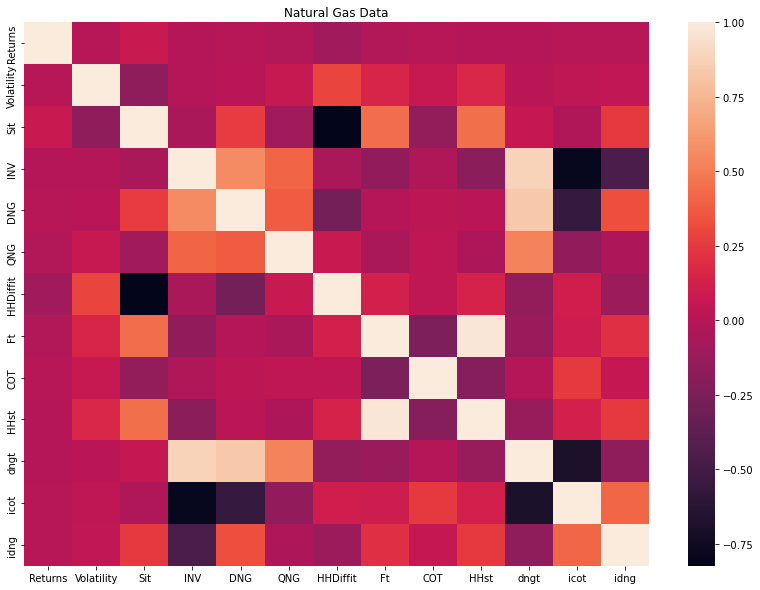

In [63]:
plt.figure(figsize=(14,10))
sns.heatmap(corrs_train)

plt.title('Natural Gas Data')
plt.plot()

In [64]:
corrs_test = test_df.corr()

In [65]:
corrs_test

Returns  Volatility       Sit       INV       DNG       QNG  \
Returns     1.000000    0.022924  0.080835 -0.060696 -0.040675 -0.013270   
Volatility  0.022924    1.000000 -0.156872 -0.020606 -0.103833 -0.154841   
Sit         0.080835   -0.156872  1.000000  0.180352  0.275014  0.263593   
INV        -0.060696   -0.020606  0.180352  1.000000  0.550407  0.512326   
DNG        -0.040675   -0.103833  0.275014  0.550407  1.000000  0.496093   
QNG        -0.013270   -0.154841  0.263593  0.512326  0.496093  1.000000   
HHDiffit   -0.098142    0.228544 -0.883988 -0.101564 -0.350125 -0.316728   
Ft         -0.052893    0.150230  0.396599  0.207913 -0.082706 -0.037512   
COT        -0.020473    0.106113  0.038289  0.077612 -0.035974  0.008531   
HHst       -0.016013    0.104351  0.437017  0.190145 -0.085703 -0.045867   
dngt       -0.070278   -0.068329  0.235470  0.859924  0.855219  0.630175   
icot        0.052470    0.021961 -0.239446 -0.872872 -0.662132 -0.287768   
idng        0.042299   -0.083170 -0.013300 -0.461037  0.407437  0.046418   

            HHDiffit        Ft       COT      HHst      dngt      icot  \
Returns    -0.098142 -0.052893 -0.020473 -0.016013 -0.070278  0.052470   
Volatility  0.228544  0.150230  0.106113  0.104351 -0.068329  0.021961   
Sit        -0.883988  0.396599  0.038289  0.437017  0.235470 -0.239446   
INV        -0.101564  0.207913  0.077612  0.190145  0.859924 -0.872872   
DNG        -0.350125 -0.082706 -0.035974 -0.085703  0.855219 -0.662132   
QNG        -0.316728 -0.037512  0.008531 -0.045867  0.630175 -0.287768   
HHDiffit    1.000000  0.064149  0.158058  0.034185 -0.222279  0.186390   
Ft          0.064149  1.000000  0.519273  0.971246  0.095807 -0.151508   
COT         0.158058  0.519273  1.000000  0.385944  0.045673  0.035210   
HHst        0.034185  0.971246  0.385944  1.000000  0.075726 -0.153273   
dngt       -0.222279  0.095807  0.045673  0.075726  1.000000 -0.793455   
icot        0.186390 -0.151508  0.035210 -0.153273 -0.793455  1.000000   
idng       -0.183369 -0.399777 -0.155775 -0.381219 -0.062304  0.300942   

                idng  
Returns     0.042299  
Volatility -0.083170  
Sit        -0.013300  
INV        -0.461037  
DNG         0.407437  
QNG         0.046418  
HHDiffit   -0.183369  
Ft         -0.399777  
COT        -0.155775  
HHst       -0.381219  
dngt       -0.062304  
icot        0.300942  
idng        1.000000

[]

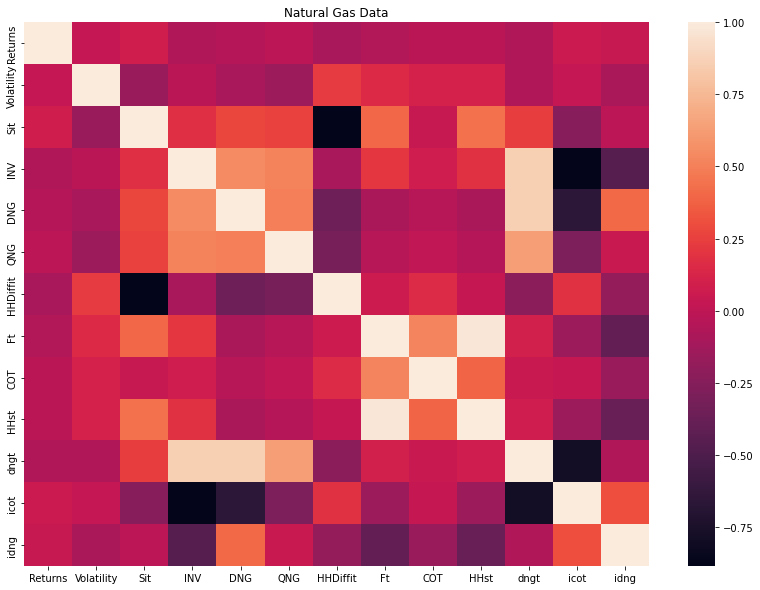

In [66]:
plt.figure(figsize=(14,10))
sns.heatmap(corrs_test)

plt.title('Natural Gas Data')
plt.plot()

In [41]:
# Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
#        'HHDiffit', 'Ft', 'COT', 'HHst', 'Node_Midwest', 'Node_Mountain',
#        'Node_Pacific', 'Node_South Central'],
#       dtype='object')

# Keep =  Sit', 'INV', 'DNG', 'QNG',
#        'HHDiffit', 'Ft', 'COT', 'dngt', 'icot', 'idng', , 'Node_Midwest', 'Node_Mountain',
#        'Node_Pacific', 'Node_South Central'
#
# Drop = "HHst", "Date", "Node", "Returns"

In [42]:
# dngt, D * INVit
# icot, (COT/INVit)
# idng, (D/INVit)

In [43]:
# σit = βo + β1*Sit + β2* INVit + β3*DNGit + β4*QNGit + β5*DiffHHit + β6*Ft + β7*cottt + β8*dngt + β9*icot + β10*idng + εit

In [44]:
# First Drop are "drop(["HHst", "Date", "Node", "Returns"]"
# Training Set
# mean squared error (MSE): 7.099670242544481e-17
# R-squared (R2 ): 0.9999999999999999
# MAE 7.45792717976182e-09

# Testing Set
# mean squared error (MSE): 1.0266646952383153e-16
# R-squared (R2 ): 0.9999999999999997
# MAE 8.704798320313259e-09

# Second Drop are "drop(["HHst", "Date", "Node", "Returns", "Volatility"]"
# Training Set
# mean squared error (MSE): 8.013985081735017e-24
# R-squared (R2 ): 1.0
# MAE 2.0521806476381245e-12

# Testing Set
# mean squared error (MSE): 6.5638199841428095e-24
# R-squared (R2 ): 1.0
# MAE 2.1968833460990043e-12

# Third Drop are "drop(["HHst", "Date", "Node", "Returns", "HHDiffit"]"
# Training Set
# mean squared error (MSE): 0.029986522849603937
# R-squared (R2 ): 0.9617479934643749
# MAE 0.09265961407434714

# Testing Set
# mean squared error (MSE): 0.020093742342101338
# R-squared (R2 ): 0.933907379948414
# MAE 0.11884703772768432

# Fourth Drop are "drop(["HHst", "Date", "Node", "Returns", "HHDiffit"]"
# Training Set
# mean squared error (MSE): 0.029986522849603937
# R-squared (R2 ): 0.9617479934643749
# MAE 0.09265961407434714

# Testing Set
# mean squared error (MSE): 0.020093742342101338
# R-squared (R2 ): 0.933907379948414
# MAE 0.11884703772768432

# Fifth Drop are "drop(["HHst", "Date", "Node", "Returns", "HHDiffit", "Volatility"]"
# Training Set
# mean squared error (MSE): 0.03007342371712424
# R-squared (R2 ): 0.9616371392459978
# MAE 0.09256132049968763

# Testing Set
# mean squared error (MSE): 0.019992143802726636
# R-squared (R2 ): 0.9342415592937228
# MAE 0.11871097043597593

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1776
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1565 non-null   float64       
 1   Volatility  1565 non-null   float64       
 2   Node        1565 non-null   object        
 3   Date        1565 non-null   datetime64[ns]
 4   Sit         1565 non-null   float64       
 5   INV         1565 non-null   int64         
 6   DNG         1565 non-null   float64       
 7   QNG         1565 non-null   float64       
 8   HHDiffit    1565 non-null   float64       
 9   Ft          1565 non-null   float64       
 10  COT         1565 non-null   int64         
 11  HHst        1565 non-null   float64       
 12  dngt        1565 non-null   float64       
 13  icot        1565 non-null   float64       
 14  idng        1565 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(2), object(1)
memory usage: 195

In [69]:
X_train_ols = train_df.drop(["HHst", "Date", "Node", "Returns", "HHDiffit", "Volatility"], axis=1).values
y_train_ols = train_df["HHst"].values

X_test_ols = test_df.drop(["HHst", "Date", "Node", "Returns", "HHDiffit", "Volatility"], axis=1).values
y_test_ols = test_df["HHst"].values

In [70]:
# Initialize the model
model3 = LinearRegression()

# FIT THE MODEL
model3.fit(X_train_ols, y_train_ols)

# EVALUATE the MODEL
train_preds = model3.predict(X_train_ols)
test_preds = model3.predict(X_test_ols)

# PRINT the METRICS
print("Training Set")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_train = mean_squared_error(y_train_ols, train_preds)
r2_train = r2_score(y_train_ols, train_preds)
mae_train = mean_absolute_error(y_train_ols, train_preds)

print(f"mean squared error (MSE): {mse_train}")
print(f"R-squared (R2 ): {r2_train}")
print(f"MAE {mae_train}")

# We cannot evaluate the metrics {Score the prediction with MSE and R2} unless we have our expected output
# from the {train_preds and test_preds}

print()

# PRINT the METRICS
print("Testing Set")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_test = mean_squared_error(y_test_ols, test_preds)
r2_test = r2_score(y_test_ols, test_preds)
mae_test = mean_absolute_error(y_test_ols, test_preds)

print(f"mean squared error (MSE): {mse_test}")
print(f"R-squared (R2 ): {r2_test}")
print(f"MAE {mae_test}")

# Compare the {evaluation_metrics} to test for overfitting
# Testing set is more important because the goal is to see how the model performs on unseen data.
# Run a new model with the goal of outperforming the Test Set evaluation metrics.

Training Set
mean squared error (MSE): 0.03007342371712424
R-squared (R2 ): 0.9616371392459978
MAE 0.09256132049968763

Testing Set
mean squared error (MSE): 0.019992143802726636
R-squared (R2 ): 0.9342415592937228
MAE 0.11871097043597593


In [71]:
# Feature engineering, column selection.
# One must use ALL ONE-HOT ENCODED COLUMNS, one cannot simply use one column and leave the rest.
abs(train_df.corr()["HHst"]).sort_values(ascending=False)

HHst          1.000000
Ft            0.978563
Sit           0.445951
idng          0.251316
COT           0.204756
INV           0.183267
Volatility    0.163630
HHDiffit      0.139246
dngt          0.130959
icot          0.127109
QNG           0.044873
Returns       0.014210
DNG           0.010554
Name: HHst, dtype: float64

In [73]:
X_train_ols = train_df.drop(["HHst", "Date", "Node", "INV", "Volatility", "HHDiffit", "dngt", "icot", "QNG", "Returns", "DNG"], axis=1).values
y_train_ols = train_df["HHst"].values

X_test_ols = test_df.drop(["HHst", "Date", "Node", "INV", "Volatility", "HHDiffit", "dngt", "icot", "QNG", "Returns", "DNG"], axis=1).values
y_test_ols = test_df["HHst"].values

In [74]:
# Initialize the model
model3 = LinearRegression()

# FIT THE MODEL
model3.fit(X_train_ols, y_train_ols)

# EVALUATE the MODEL
train_preds = model3.predict(X_train_ols)
test_preds = model3.predict(X_test_ols)

# PRINT the METRICS
print("Training Set")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_train = mean_squared_error(y_train_ols, train_preds)
r2_train = r2_score(y_train_ols, train_preds)
mae_train = mean_absolute_error(y_train_ols, train_preds)

print(f"mean squared error (MSE): {mse_train}")
print(f"R-squared (R2 ): {r2_train}")
print(f"MAE {mae_train}")

# We cannot evaluate the metrics {Score the prediction with MSE and R2} unless we have our expected output
# from the {train_preds and test_preds}

print()

# PRINT the METRICS
print("Testing Set")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_test = mean_squared_error(y_test_ols, test_preds)
r2_test = r2_score(y_test_ols, test_preds)
mae_test = mean_absolute_error(y_test_ols, test_preds)

print(f"mean squared error (MSE): {mse_test}")
print(f"R-squared (R2 ): {r2_test}")
print(f"MAE {mae_test}")

# Compare the {evaluation_metrics} to test for overfitting
# Testing set is more important because the goal is to see how the model performs on unseen data.
# Run a new model with the goal of outperforming the Test Set evaluation metrics.

Training Set
mean squared error (MSE): 0.03058463888834544
R-squared (R2 ): 0.9609850127500803
MAE 0.09261459836191639

Testing Set
mean squared error (MSE): 0.020693879687247896
R-squared (R2 ): 0.9319333997481984
MAE 0.11939764863064976


In [72]:
# Feature engineering, column selection.
# One must use ALL ONE-HOT ENCODED COLUMNS, one cannot simply use one column and leave the rest.
abs(test_df.corr()["HHst"]).sort_values(ascending=False)

HHst          1.000000
Ft            0.971246
Sit           0.437017
COT           0.385944
idng          0.381219
INV           0.190145
icot          0.153273
Volatility    0.104351
DNG           0.085703
dngt          0.075726
QNG           0.045867
HHDiffit      0.034185
Returns       0.016013
Name: HHst, dtype: float64

In [75]:
X_train_ols = train_df.drop(["HHst", "Date", "Node", "INV", "icot", "Volatility", "DNG", "dngt", "QNG", "HHDiffit", "Returns"], axis=1).values
y_train_ols = train_df["HHst"].values

X_test_ols = test_df.drop(["HHst", "Date", "Node", "INV", "icot", "Volatility", "DNG", "dngt", "QNG", "HHDiffit", "Returns"], axis=1).values
y_test_ols = test_df["HHst"].values

In [76]:
# Initialize the model
model4 = LinearRegression()

# FIT THE MODEL
model4.fit(X_train_ols, y_train_ols)

# EVALUATE the MODEL
train_preds = model3.predict(X_train_ols)
test_preds = model3.predict(X_test_ols)

# PRINT the METRICS
print("Training Set")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_train = mean_squared_error(y_train_ols, train_preds)
r2_train = r2_score(y_train_ols, train_preds)
mae_train = mean_absolute_error(y_train_ols, train_preds)

print(f"mean squared error (MSE): {mse_train}")
print(f"R-squared (R2 ): {r2_train}")
print(f"MAE {mae_train}")

# We cannot evaluate the metrics {Score the prediction with MSE and R2} unless we have our expected output
# from the {train_preds and test_preds}

print()

# PRINT the METRICS
print("Testing Set")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_test = mean_squared_error(y_test_ols, test_preds)
r2_test = r2_score(y_test_ols, test_preds)
mae_test = mean_absolute_error(y_test_ols, test_preds)

print(f"mean squared error (MSE): {mse_test}")
print(f"R-squared (R2 ): {r2_test}")
print(f"MAE {mae_test}")

# Compare the {evaluation_metrics} to test for overfitting
# Testing set is more important because the goal is to see how the model performs on unseen data.
# Run a new model with the goal of outperforming the Test Set evaluation metrics.

Training Set
mean squared error (MSE): 0.03058463888834544
R-squared (R2 ): 0.9609850127500803
MAE 0.09261459836191639

Testing Set
mean squared error (MSE): 0.020693879687247896
R-squared (R2 ): 0.9319333997481984
MAE 0.11939764863064976
